# 🏀 Overview
Hi! I'm Coz, here to step you through a basic Exploratory Data Analysis (EDA) for our March Machine Learning Mania 2025! This is an important step in understanding the problem before beginning work building machine learning models.

Here I'll take you through how to explore some of the data that's been provided and create useful visualisations.

Remember to leave an upvote and a comment if you like it!

## General Info

### Structure and Tournaments
1. **Tournament Format**:
   - **Men's and Women's Tournaments** both follow a **single-elimination format**.
   - The tournaments are usually held in **March and April** each year.
   - The tournaments consist of **64 teams** (with some play-in games to narrow down to 64) for both men's and women's events.
   - **Seeding**: Teams are ranked and seeded within the tournament, with **selection committees** determining the seeding and bracket placement based on regular-season performance, conference championships, and other factors like strength of schedule.

2. **Regions**:
   - The tournaments are divided into **four regions** (East, West, South, and Midwest) for both men's and women's competitions.
   - Each region features a bracket with teams seeded from 1 to 16, and the higher-seeded team is typically favored in matchups.
  
3. **Matchups and Upsets**:
   - Data on matchups, seedings, and outcomes is key for analysis, as historical trends (like 16-seeds beating 1-seeds) or upsets can be analyzed for patterns.
   - **Bracket progression**: Teams progress through the rounds: first round, second round, Sweet Sixteen, Elite Eight, Final Four, and Championship game.

4. **Historical Data**:
   - **Team performance**: Data on past winners, runner-ups, and teams that made deep runs can provide insights into trends, such as the impact of seedings, conference affiliations, or specific team characteristics.
   - **Player performance**: Tracking individual player stats (points scored, rebounds, assists, etc.) from historical games can be useful for evaluating player contributions and their impact on the outcome.
   - **Game statistics**: This includes scores, shooting percentages, turnovers, fouls, and other in-game statistics to help identify factors contributing to wins and losses.

### Key Metrics for Data Analysis
1. **Seeding vs. Performance**: Analyzing how well higher-seeded teams perform versus lower-seeded teams. Historically, higher-seeded teams tend to perform better, but there are notable exceptions (e.g., 16-seed or 10-seed upsets).
  
2. **Historical Trends and Patterns**:
   - **Upsets**: The number and frequency of upsets (lower-seeded teams defeating higher-seeded teams), particularly in early rounds.
   - **Sweet Sixteen/Elite Eight Success**: Analyzing how often top seeds make it to the later rounds can show the importance of seed placement.
   - **Final Four and Championship Appearances**: Identifying teams and conferences that consistently perform well in the tournament.
  
3. **Team and Conference Performance**:
   - **Conference Strength**: Evaluating how teams from certain conferences perform overall and in key rounds. Historically, conferences like the ACC, Big Ten, and SEC have strong tournament representation.
   - **Team Characteristics**: Data analysis can explore factors such as scoring styles (offensive vs. defensive teams), turnover rates, field goal percentages, and bench depth.


### What is the NCAA?

In the context of the NCAA (National Collegiate Athletic Association), regions are divisions used in tournaments to organize teams and structure the competition. This is particularly evident in basketball tournaments, like the NCAA Division I Men's Basketball Tournament (March Madness).

Here's how the regions work:

Tournament Structure: The tournament features 68 teams, which are divided into four regional brackets. Each region is designated a specific name, usually based on geographic locations (e.g., East, West, South, and Midwest).

Seeding: Within each region, teams are seeded from 1 to 16 (1 being the best, 16 the lowest), based on their regular-season performance, conference championships, and selection committee rankings. The higher-seeded teams are placed in positions where they have a theoretically easier path to advance.

Bracket Setup: Teams in the same region will only face each other until the regional finals, at which point the winner of each region advances to the Final Four. For example:

East Region: Teams play in the "East" bracket to determine the regional champion.
West Region: Similarly for the West.
South and Midwest: Follow the same structure for their respective regions.
Regional Finals: The last team standing in each of the four regions becomes a regional champion. These teams then move on to the Final Four, where they compete for the national championship.

The concept of regions helps balance the competition and ensures that teams from similar areas or conferences don’t meet early on, making for a more dynamic and fair tournament structure.

## Aims

We want to predict the match results for the 2025 March Madness, only using the data from previous years. Our aim is to build some kind of analysis model which can guess the probability of winning for each matchup to score the best overall.

# ⚙️ Setup 
First we need to import the necessary libraries, set the right settings and prepare the right tools for our EDA.

In [1]:
# Essential Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import ipywidgets as widgets
from IPython.display import display
import warnings

# Niche Imports
import chardet

In [2]:
# Settings
sns.set_style("whitegrid")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
warnings.filterwarnings("ignore")

In [3]:
# Tools
def load_csv(csv_file):
    with open(csv_file, "rb") as f:
        raw_data = f.read()
        result = chardet.detect(raw_data)
    
    # print(result)  # Check detected encoding
    df = pd.read_csv(csv_file, encoding=result["encoding"])
    return df

# 📂 Prepare files
Let's take an initial peek at the files we've been provided.

The description for each file is given on the competition data page: https://www.kaggle.com/competitions/march-machine-learning-mania-2025/data

The organisers have broken them into 5 sections:
1. **The Basics** - This section provides everything you need to build a simple prediction model and submit predictions.
2. **Team Box Scores** - This section provides game-by-game stats at a team level (free throws attempted, defensive rebounds, turnovers, etc.) for all regular season, conference tournament, and NCAA® tournament games since the 2003 season (men) or since the 2010 season (women).
3. **Geography** - This section provides city locations of all regular season, conference tournament, and NCAA® tournament games since the 2010 season
4. **Public Rankings** - This section provides weekly team rankings (men's teams only) for dozens of top rating systems - Pomeroy, Sagarin, RPI, ESPN, etc., since the 2003 season
5. **Supplements** - This section contains additional supporting information, including coaches, conference affiliations, alternative team name spellings, bracket structure, and game results for NIT and other postseason tournaments.

In [4]:
# View files

def get_comp_files_and_dirs(input_dir):
    file_list = []
    dir_list = []
    try:
        for comp_dir in os.listdir(input_dir):
            comp_path = '/'.join([input_dir, comp_dir])
            print(f"Competition Directory: {comp_path}")
            print("Contains:")
            with os.scandir(comp_path) as entries:
                for entry in entries:
                    if entry.is_file():
                        print(f"- (File) {entry.name}, Size: {entry.stat().st_size} bytes")
                        file_list.append(os.path.join(input_dir, comp_dir, entry))
                    elif entry.is_dir():
                        print(f"- (Folder) {entry.name}")
                        dir_list.append(os.path.join(input_dir, comp_dir, entry))

    except FileNotFoundError:
        print(f"The specified directory '{directory}' does not exist.")
    except PermissionError:
        print(f"Permission error accessing directory '{directory}'.")
    return file_list, dir_list
    
input_dir = '/kaggle/input'
file_list, dir_list = get_comp_files_and_dirs(input_dir)

Competition Directory: /kaggle/input/march-machine-learning-mania-2025
Contains:
- (File) Conferences.csv, Size: 1643 bytes
- (File) SeedBenchmarkStage1.csv, Size: 10649275 bytes
- (File) WNCAATourneyDetailedResults.csv, Size: 89624 bytes
- (File) WRegularSeasonCompactResults.csv, Size: 3949227 bytes
- (File) MNCAATourneySeedRoundSlots.csv, Size: 15904 bytes
- (File) MRegularSeasonDetailedResults.csv, Size: 11613384 bytes
- (File) MNCAATourneyCompactResults.csv, Size: 75699 bytes
- (File) MGameCities.csv, Size: 2724091 bytes
- (File) WSecondaryTourneyCompactResults.csv, Size: 28919 bytes
- (File) WGameCities.csv, Size: 2621798 bytes
- (File) MSeasons.csv, Size: 1819 bytes
- (File) WNCAATourneySlots.csv, Size: 34266 bytes
- (File) MSecondaryTourneyTeams.csv, Size: 27572 bytes
- (File) Cities.csv, Size: 9612 bytes
- (File) MTeamSpellings.csv, Size: 22758 bytes
- (File) MRegularSeasonCompactResults.csv, Size: 5591072 bytes
- (File) MMasseyOrdinals.csv, Size: 119629314 bytes
- (File) MSeco

In [5]:
comp_dir = '/kaggle/input/march-machine-learning-mania-2025'
data_section_1_mens_list = [
    'MTeams.csv',
    'MSeasons.csv',
    'MNCAATourneySeeds.csv',
    'MRegularSeasonCompactResults.csv',
    'MNCAATourneyCompactResults.csv'
]
data_section_1_womens_list = [
    'WTeams.csv',
    'WSeasons.csv',
    'WNCAATourneySeeds.csv',
    'WRegularSeasonCompactResults.csv',
    'WNCAATourneyCompactResults.csv',
]
sample_submission = 'SampleSubmissionStage1.csv'
data_section_2_mens_list = [
    'MRegularSeasonDetailedResults.csv',
    'MNCAATourneyDetailedResults.csv',
]
data_section_2_womens_list = [
    'WRegularSeasonDetailedResults.csv',
    'WNCAATourneyDetailedResults.csv',
]
data_section_3_mens_list = [
    'Cities.csv',
    'MGameCities.csv',
]
data_section_3_womens_list = [
    'Cities.csv',
    'WGameCities.csv',
]
data_section_4_list = [
    'MMasseyOrdinals.csv'
]
data_section_5_list = [
    'MTeamCoaches.csv'
]

# 📊 Data Section 1 - The Basics
**This section provides everything you need to build a simple prediction model and submit predictions.**

- Team ID's and Team Names
- Tournament seeds since 1984-85 season
- Final scores of all regular season, conference tournament, and NCAA® tournament games since 1984-85 season
- Season-level details including dates and region names
- Example submission file for stage 1

**By convention, when we identify a particular season, we will reference the year that the season ends in, not the year that it starts in.**

## Teams
Data Section 1 file: MTeams.csv and WTeams.csv

These files identify the different college teams present in the dataset .

1. TeamID - a 4 digit id number, uniquely identifying each NCAA® men's or women's team. A school's TeamID does not change from one year to the next, so for instance the Duke men's TeamID is 1181 for all seasons. The men's team ID's range from 1000-1999, whereas all of the women's team ID's range from 3000-3999.
2. TeamName - a compact spelling of the team's college name, 16 characters or fewer.
3. FirstD1Season - the first season in our dataset that the school was a Division-I school. This column is only present in the men's data, so it is not found in WTeams.csv.
4. LastD1Season - the last season in our dataset that the school was a Division-I school. For any teams that are currently Division-I, they will be listed with LastD1Season=2025. Again, this column is only present in the men's data, so it is not found in WTeams.csv.

In [6]:
mens_df = load_csv(os.path.join(comp_dir, 'MTeams.csv'))
womens_df = load_csv(os.path.join(comp_dir, 'WTeams.csv'))
for gender in ['Mens', 'Womens']:
    print(f"Investigating {gender} Team")
    if gender == 'Mens':
        df = mens_df
    else:
        df = womens_df
    display(df.describe())
    display(df.head())

Investigating Mens Team


,TeamID,FirstD1Season,LastD1Season
count,380.000000,380.000000,380.000000
mean,1290.500000,1989.618421,2023.952632
std,109.840794,9.755814,5.686894
min,1101.000000,1985.000000,1985.000000
25%,1195.750000,1985.000000,2025.000000
50%,1290.500000,1985.000000,2025.000000
75%,1385.250000,1986.250000,2025.000000
max,1480.000000,2025.000000,2025.000000


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2025
1,1102,Air Force,1985,2025
2,1103,Akron,1985,2025
3,1104,Alabama,1985,2025
4,1105,Alabama A&M,2000,2025


Investigating Womens Team


,TeamID
count,378.000000
mean,3290.465608
std,109.637116
min,3101.000000
25%,3196.250000
50%,3290.500000
75%,3384.750000
max,3480.000000


,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron
3,3104,Alabama
4,3105,Alabama A&M


> Already it's interesting to see that the Womens teams don't have a FirstD1Season and LastD1Season listed. Also that there are 2 less teams for the womens.

In [7]:
# Find unique values in Team Names
series1 = mens_df['TeamName']
series2 = womens_df['TeamName']
unique_in_series1 = series1[~series1.isin(series2)]

# Values in series2 but not in series1
unique_in_series2 = series2[~series2.isin(series1)]

# Combine results
unique_values = pd.concat([unique_in_series1, unique_in_series2])

print(unique_values)

53     Citadel
339        VMI
Name: TeamName, dtype: object


> It looks like these 2 teams are in the Mens but not the Womens.

Now let's visualise the mens seaons durations

Investigating Mens Team


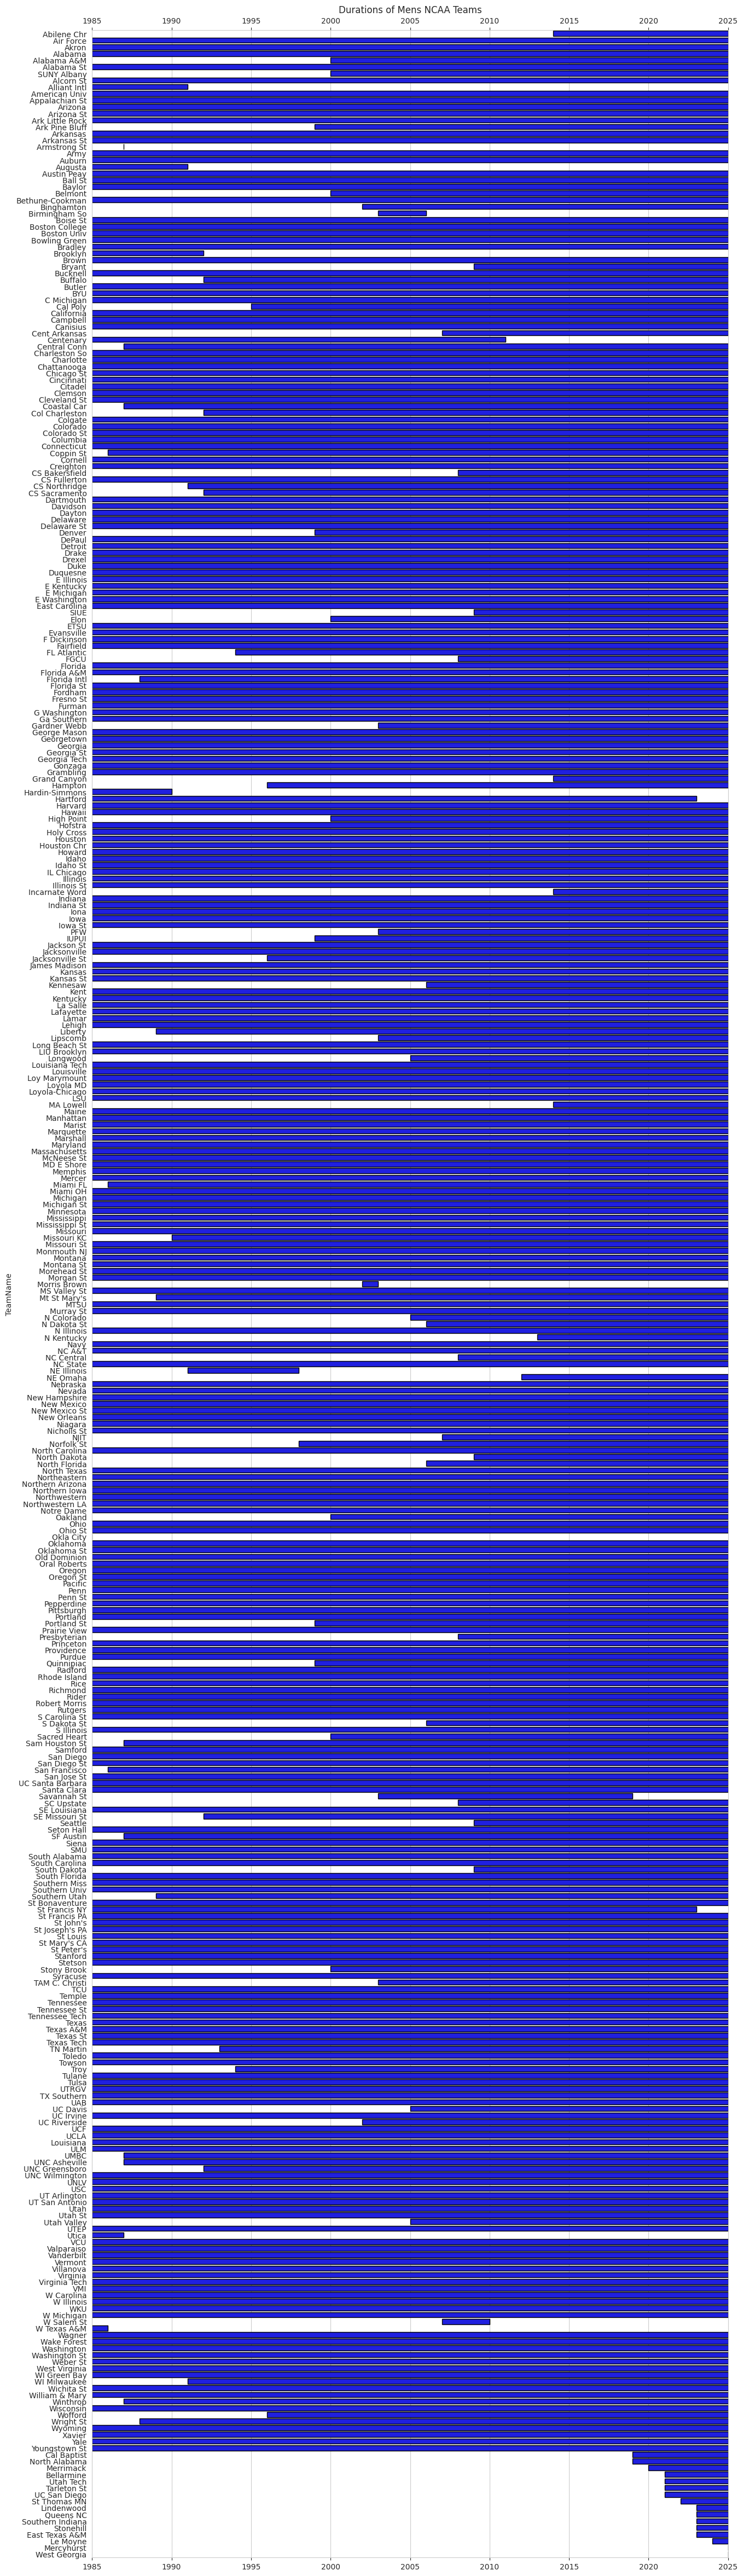

In [8]:
# Plot the durations of each team
for gender in ['Mens']:
    print(f"Investigating {gender} Team")
    df = load_csv(os.path.join(comp_dir, 'MTeams.csv'))

    # Calculate the width of the bar
    df['Widths'] = df['LastD1Season'] - df['FirstD1Season']
    

    # # Plot bars
    fig, ax = plt.subplots(figsize=(15,60))
    # ax.barh(df['TeamName'], df['Widths'], left=df['FirstD1Season'], color='blue', edgecolor='black')
    # ax.invert_yaxis()
    # # Labels and grid
    # ax.set_xlabel("Value")
    # ax.set_ylabel("Bars")
    # ax.set_title("Horizontal Bars from Start to End Values")
    # ax.grid(axis='x', linestyle='--', alpha=0.7)
    # plt.tight_layout()
    
    # plt.show()

    sns.barplot(
        data=df,
        y="TeamName",        # Y-axis (categorical variable)
        x="Widths",          # X-axis (bar length)
        hue=None,            # No grouping
        orient="h",          # Horizontal bars
        color="blue",        # Bar color
        edgecolor="black",   # Border color
        ax=ax                # Use the existing axis
    )
    # Offset each bar by the start
    for i, (start, width) in enumerate(zip(df["FirstD1Season"], df["Widths"])):
        ax.patches[i].set_x(start)  # Shift bar to start position
    ax.set_xlim(df["FirstD1Season"].min(), df["LastD1Season"].max())  # Fit all bars correctly
    # Show x-axis at the top as well
    ax.xaxis.set_ticks_position("both")  # Show ticks on both top and bottom
    ax.xaxis.set_label_position("top")   # Move x-axis label to the top
    ax.tick_params(axis="x", which="both", labeltop=True, labelbottom=True)  # Show tick labels at the top
    ax.spines["top"].set_visible(True)   # Show the top spine (border)
    ax.set_xlabel("")
    plt.title('Durations of Mens NCAA Teams')
    plt.show()


## Seasons
Data Section 1 file: MSeasons.csv and WSeasons.csv

These files identify the different seasons included in the historical data, along with certain season-level properties. There are separate files for men's data (MSeasons) and women's data (WSeasons).

1. Season - indicates the year in which the tournament was played.
2. DayZero - tells you the date corresponding to DayNum=0 during that season. All game dates have been aligned upon a common scale so that (each year) the Monday championship game of the men's tournament is on DayNum=154. Working backward, the men's national semifinals are always on DayNum=152, the men's "play-in" games are on days 134-135, Selection Sunday is on day 132, the final day of the regular season is also day 132, and so on. All game data includes the day number in order to make it easier to perform date calculations. If you need to know the exact date a game was played on, you can combine the game's "DayNum" with the season's "DayZero". For instance, since day zero during the 2011-2012 season was 10/31/2011, if we know that the earliest regular season games that year were played on DayNum=7, they were therefore played on 11/07/2011. Also note that the men's and women's data share the same DayZero each season, although the women's championship game is not necessarily played on DayNum=154
3. RegionW, RegionX, Region Y, Region Z - by our competitions' convention, each of the four regions in the final tournament is assigned a letter of W, X, Y, or Z. Whichever region's name comes first alphabetically, that region will be Region W. And whichever Region plays against Region W in the national semifinals, that will be Region X. For the other two regions, whichever region's name comes first alphabetically, that region will be Region Y, and the other will be Region Z. This allows us to identify the regions in a standardized way in other files, even if the region names change from year to year.

In [9]:
mens_df = load_csv(os.path.join(comp_dir, 'MSeasons.csv'))
womens_df = load_csv(os.path.join(comp_dir, 'WSeasons.csv'))
for gender in ['Mens', 'Womens']:
    print(f"Investigating {gender} Team")
    if gender == 'Mens':
        df = mens_df
    else:
        df = womens_df
    display(df.describe())
    display(df.head())

Investigating Mens Team


,Season
count,41.000000
mean,2005.000000
std,11.979149
min,1985.000000
25%,1995.000000
50%,2005.000000
75%,2015.000000
max,2025.000000


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/02/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


Investigating Womens Team


,Season
count,28.000000
mean,2011.500000
std,8.225975
min,1998.000000
25%,2004.750000
50%,2011.500000
75%,2018.250000
max,2025.000000


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1998,10/27/1997,East,Midwest,Mideast,West
1,1999,10/26/1998,East,Mideast,Midwest,West
2,2000,11/01/1999,East,Midwest,Mideast,West
3,2001,10/30/2000,East,Midwest,Mideast,West
4,2002,10/29/2001,East,West,Mideast,Midwest


## Tourney Seeds
Data Section 1 file: MNCAATourneySeeds.csv and WNCAATourneySeeds.csv

These files identify the seeds for all teams in each NCAA® tournament, for all seasons of historical data. Thus, there are between 64-68 rows for each year, depending on whether there were any play-in games and how many there were. In recent years the structure has settled at 68 total teams, with four "play-in" games leading to the final field of 64 teams entering Round 1 on Thursday/Friday of the first week (by definition, that is DayNum=136/137 each season). We will not know the seeds of the respective tournament teams, or even exactly which 68 teams it will be, until Selection Sunday on March 16, 2025 (DayNum=132).

1. Season - the year that the tournament was played in
2. Seed - this is a 3-character or 4-character identifier of the seed, where the first character is either W, X, Y, or Z (identifying the region the team was in) and the next two digits (either 01, 02, ..., 15, or 16) tell you the seed within the region. For play-in teams, there is a fourth character (a or b) to further distinguish the seeds, since teams that face each other in the play-in games will have seeds with the same first three characters. The "a" and "b" are assigned based on which Team ID is lower numerically.
3. TeamID - this identifies the id number of the team, as specified in the MTeams.csv or WTeams.csv file

In [10]:
mens_df = load_csv(os.path.join(comp_dir, 'MNCAATourneySeeds.csv'))
womens_df = load_csv(os.path.join(comp_dir, 'WNCAATourneySeeds.csv'))
for gender in ['Mens', 'Womens']:
    print(f"Investigating {gender} Team")
    if gender == 'Mens':
        df = mens_df
    else:
        df = womens_df
    display(df.describe())
    display(df.head())

Investigating Mens Team


,Season,TeamID
count,2558.000000,2558.000000
mean,2004.376466,1290.900704
std,11.449682,103.447343
min,1985.000000,1101.000000
25%,1994.250000,1208.000000
50%,2004.000000,1285.000000
75%,2014.000000,1387.000000
max,2024.000000,1463.000000


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


Investigating Womens Team


,Season,TeamID
count,1676.000000,1676.000000
mean,2010.742243,3286.954057
std,7.775685,100.040265
min,1998.000000,3101.000000
25%,2004.000000,3206.500000
50%,2011.000000,3281.000000
75%,2017.000000,3376.250000
max,2024.000000,3465.000000


,Season,Seed,TeamID
0,1998,W01,3330
1,1998,W02,3163
2,1998,W03,3112
3,1998,W04,3301
4,1998,W05,3272


> The Seed for each team will be a useful component for analysis. This will need to be combined with the region as well.

## Regular Season Results
Data Section 1 file: MRegularSeasonCompactResults.csv and WRegularSeasonCompactResults.csv

These files identify the game-by-game results for many seasons of historical data, starting with the 1985 season for men (the first year the NCAA® had a 64-team men's tournament) and the 1998 season for women. For each season, the file includes all games played from DayNum 0 through 132. It is important to realize that the "Regular Season" games are simply defined to be all games played on DayNum=132 or earlier (DayNum=132 is Selection Sunday, and there are always a few conference tournament finals actually played early in the day on Selection Sunday itself).

1. Season - this is the year of the associated entry in MSeasons.csv or WSeasons.csv, namely the year in which the final tournament occurs.
2. DayNum - this integer always ranges from 0 to 132, and tells you what day the game was played on. It represents an offset from the "DayZero" date in the "MSeasons.csv" or "WSeasons.csv" file.
3. WTeamID - this identifies the id number of the team that won the game, as listed in the "MTeams.csv" or "WTeams.csv" file. No matter whether the game was won by the home team or visiting team, or if it was a neutral-site game, the "WTeamID" always identifies the winning team. Both the men's data and women's data will identify the winning team id by this WTeamID column. The same note applies to WScore and WLoc below - these are "W" for "winning" and not for "women's".
4. WScore - this identifies the number of points scored by the winning team.
5. LTeamID - this identifies the id number of the team that lost the game.
6. LScore - this identifies the number of points scored by the losing team.
7. WLoc - this identifies the "location" of the winning team. If the winning team was the home team, this value will be "H". If the winning team was the visiting (or "away") team, this value will be "A". If it was played on a neutral court, then this value will be "N".
8. NumOT - this indicates the number of overtime periods in the game, an integer 0 or higher.

In [11]:
mens_df = load_csv(os.path.join(comp_dir, 'MRegularSeasonCompactResults.csv'))
womens_df = load_csv(os.path.join(comp_dir, 'WRegularSeasonCompactResults.csv'))
for gender in ['Mens', 'Womens']:
    print(f"Investigating {gender} Team")
    if gender == 'Mens':
        df = mens_df
    else:
        df = womens_df
    display(df.describe())
    display(df.head())

Investigating Mens Team


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT
count,190771.000000,190771.000000,190771.000000,190771.000000,190771.000000,190771.000000,190771.000000
mean,2006.170629,73.483690,1287.589455,76.849112,1283.285961,64.757253,0.048812
std,11.573526,34.280004,104.888255,11.843356,105.085653,11.206328,0.258660
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1996.000000,44.000000,1199.000000,69.000000,1191.000000,57.000000,0.000000
50%,2007.000000,75.000000,1285.000000,76.000000,1281.000000,64.000000,0.000000
75%,2016.000000,103.000000,1380.000000,84.000000,1375.000000,72.000000,0.000000
max,2025.000000,132.000000,1480.000000,186.000000,1480.000000,150.000000,6.000000


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


Investigating Womens Team


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT
count,134961.000000,134961.000000,134961.000000,134961.000000,134961.000000,134961.000000,134961.000000
mean,2011.763880,70.567912,3285.006632,71.926134,3285.377983,57.513467,0.039619
std,7.830872,35.357955,104.049880,11.377089,105.541043,10.798511,0.227763
min,1998.000000,0.000000,3101.000000,30.000000,3101.000000,11.000000,0.000000
25%,2005.000000,39.000000,3196.000000,64.000000,3193.000000,50.000000,0.000000
50%,2012.000000,73.000000,3282.000000,71.000000,3285.000000,57.000000,0.000000
75%,2018.000000,101.000000,3377.000000,79.000000,3376.000000,64.000000,0.000000
max,2025.000000,132.000000,3480.000000,140.000000,3480.000000,130.000000,5.000000


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,18,3104,91,3202,41,H,0
1,1998,18,3163,87,3221,76,H,0
2,1998,18,3222,66,3261,59,H,0
3,1998,18,3307,69,3365,62,H,0
4,1998,18,3349,115,3411,35,H,0


> Ooh here's where the juicy data starts

Investigating Mens Team


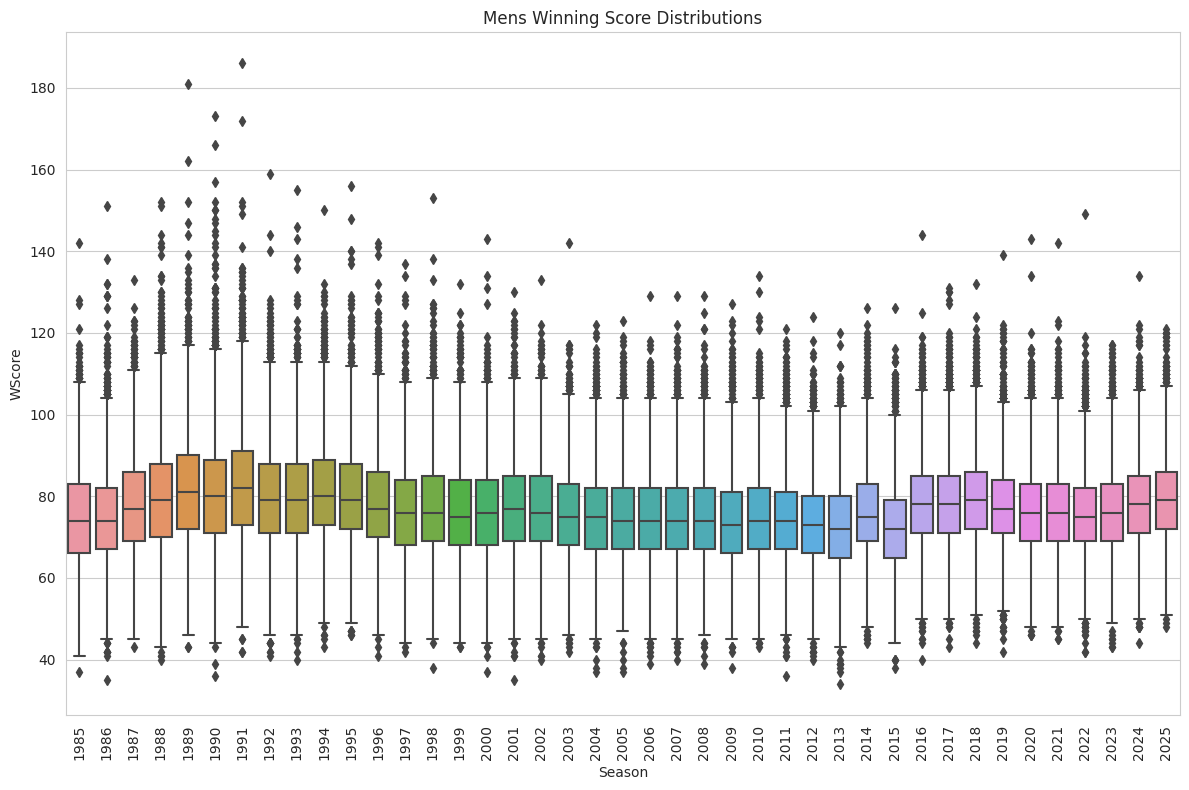

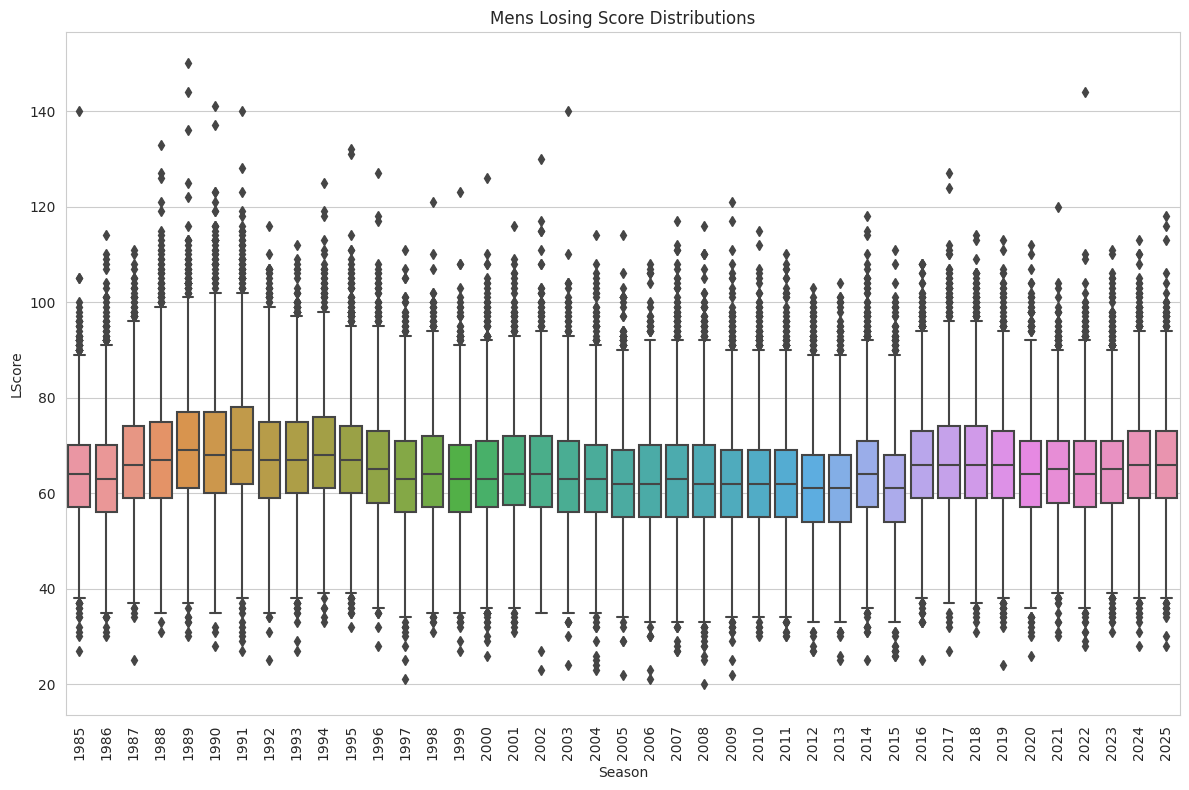

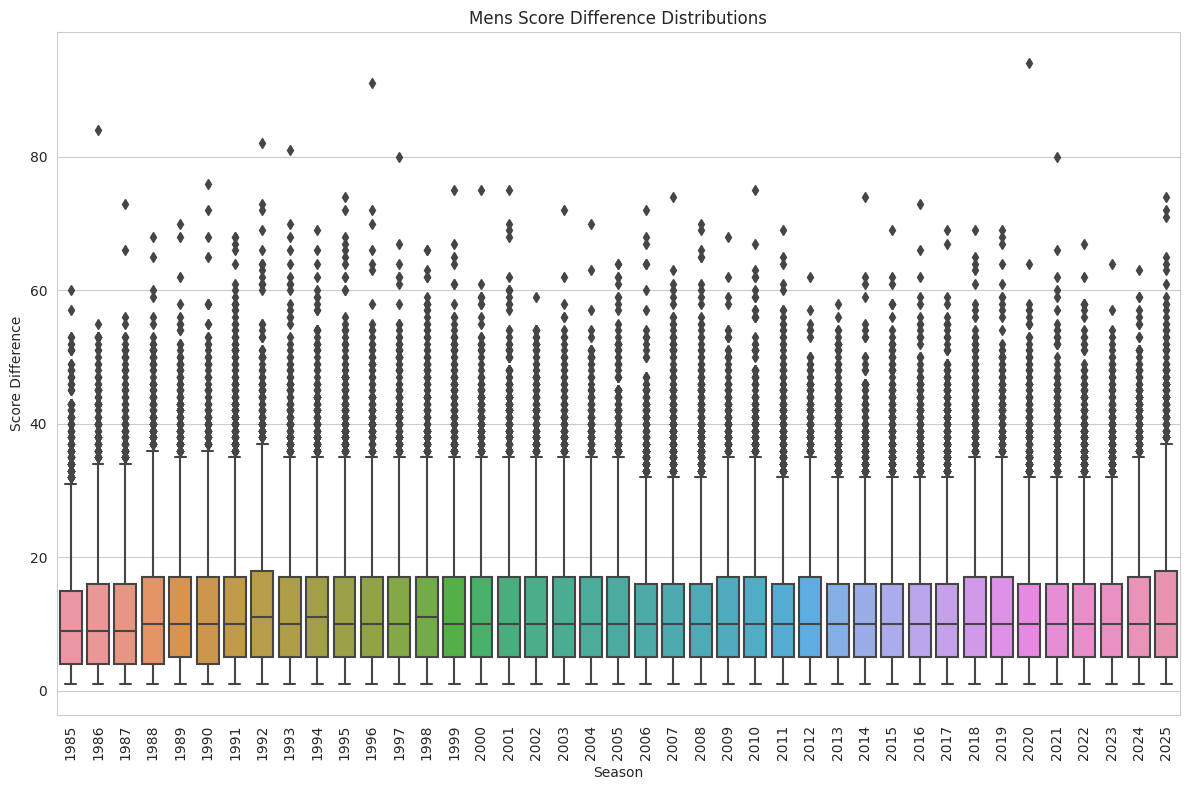

Investigating Womens Team


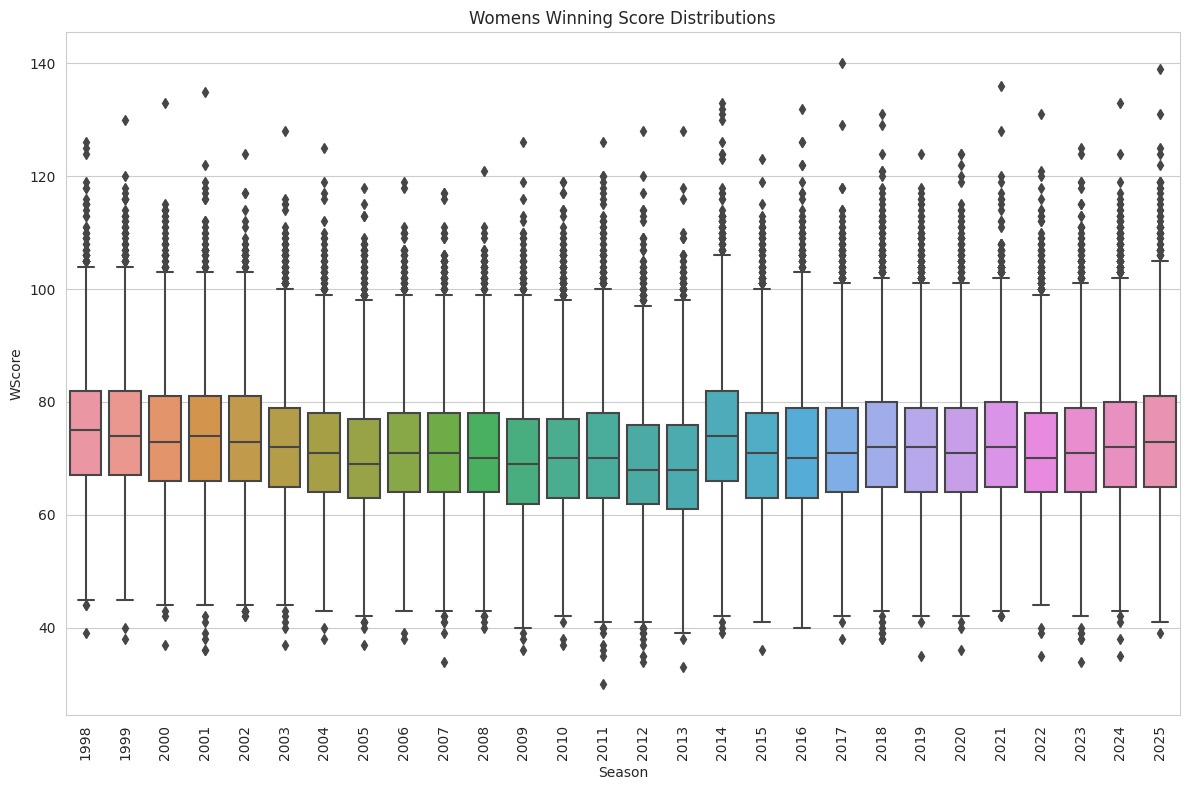

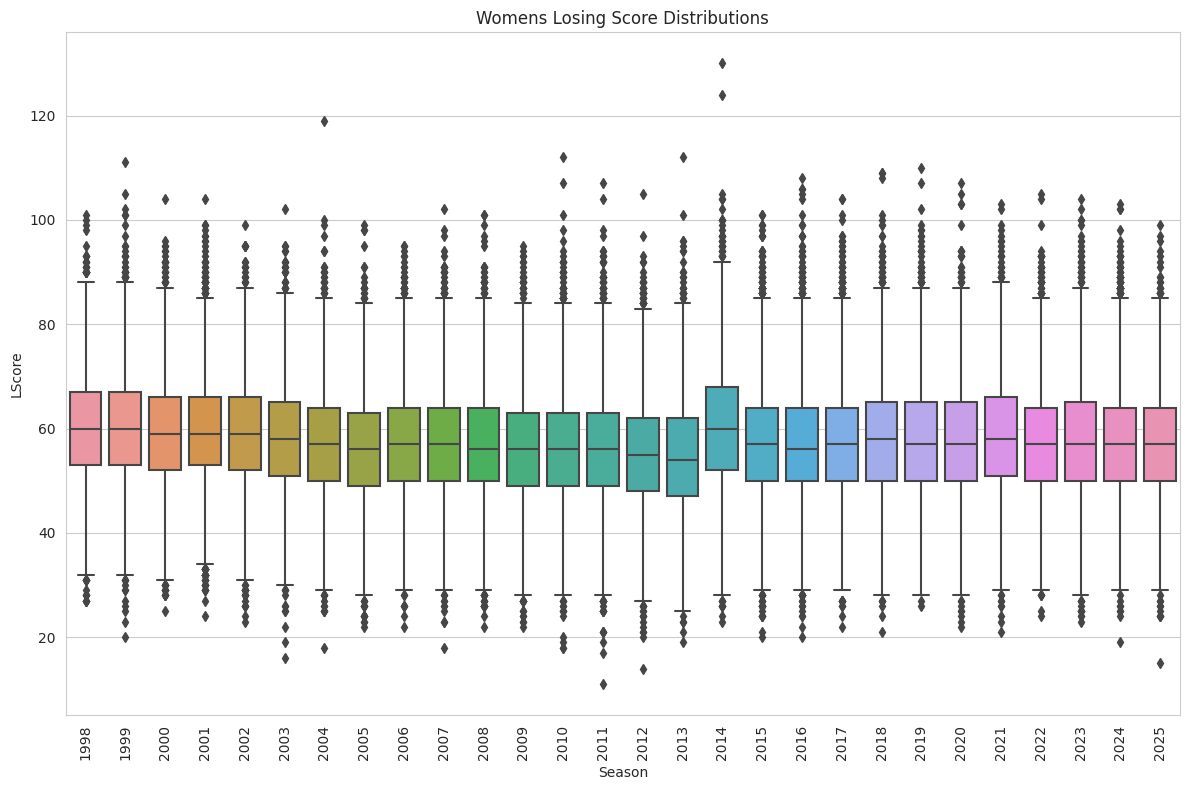

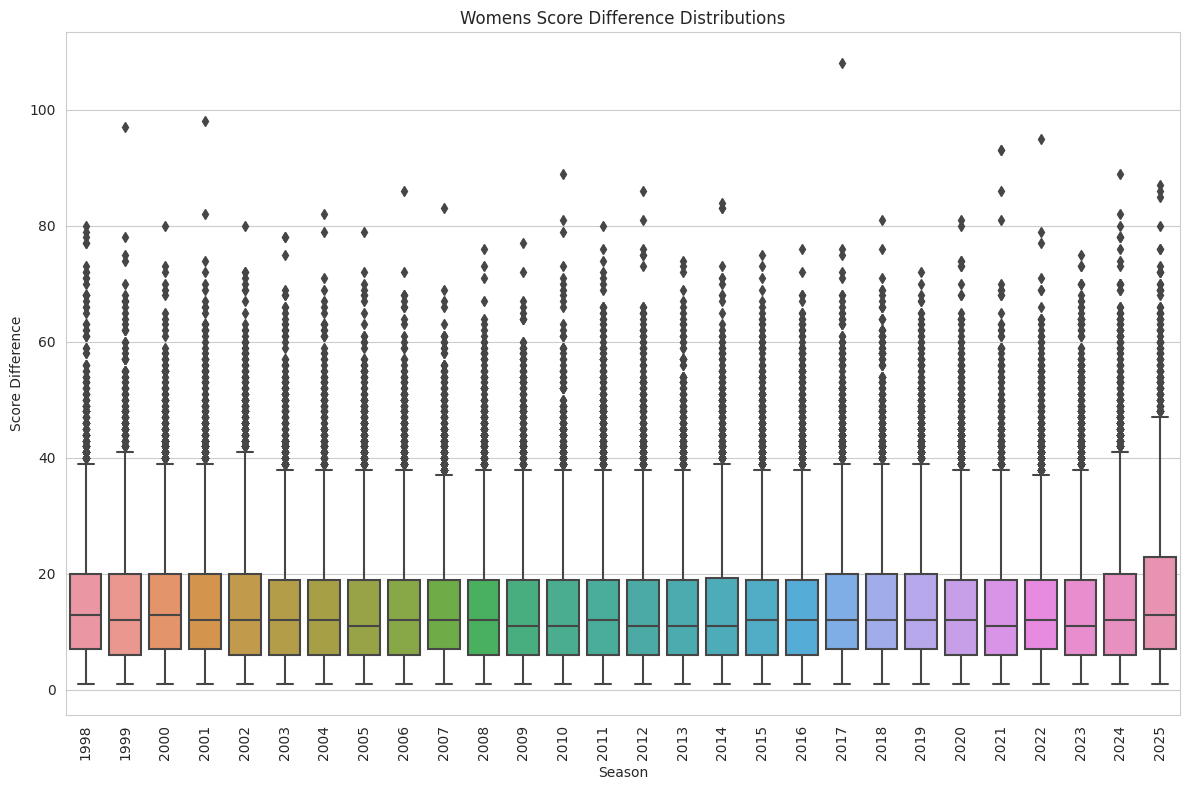

In [12]:
# Look at distributions of winning and losing scores across seasons
for gender in ['Mens', 'Womens']:
    print(f"Investigating {gender} Team")
    if gender == 'Mens':
        df = mens_df
    else:
        df = womens_df
    df['Score Difference']  = df['WScore'] - df['LScore']

    plt.figure(figsize=(12,8))
    sns.boxplot(x='Season', y='WScore', data=df)
    plt.xticks(rotation=90)
    plt.title(f'{gender} Winning Score Distributions')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12,8))
    sns.boxplot(x='Season', y='LScore', data=df)
    plt.xticks(rotation=90)
    plt.title(f'{gender} Losing Score Distributions')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12,8))
    sns.boxplot(x='Season', y='Score Difference', data=df)
    plt.xticks(rotation=90)
    plt.title(f'{gender} Score Difference Distributions')
    plt.tight_layout()
    plt.show()

> Seems to be pretty steady.

More ideas to look at for this data:
- Number of wins per team per year
- Classify into types based on score difference

## Tourney Results
Data Section 1 file: MNCAATourneyCompactResults.csv and WNCAATourneyCompactResults.csv

These files identify the game-by-game NCAA® tournament results for all seasons of historical data. The data is formatted exactly like the corresponding Regular Season Compact Results data. All men's games will show up as neutral site (so WLoc is always N) and some women's games will show up as neutral site, depending on the specifics.

Because of the consistent structure of the NCAA® tournament schedule, you can generally tell what round a men's game was, just by looking at its day number. However, the men's 2021 tournament scheduling was slightly different, and the women's scheduling has varied a lot. Nevertheless, in general the men's schedule will be:

1. DayNum=134 or 135 (Tue/Wed) - play-in games to get the tournament field down to the final 64 teams
2. DayNum=136 or 137 (Thu/Fri) - Round 1, to bring the tournament field from 64 teams to 32 teams
3. DayNum=138 or 139 (Sat/Sun) - Round 2, to bring the tournament field from 32 teams to 16 teams
4. DayNum=143 or 144 (Thu/Fri) - Round 3, otherwise known as "Sweet Sixteen", to bring the tournament field from 16 teams to 8 teams
5. DayNum=145 or 146 (Sat/Sun) - Round 4, otherwise known as "Elite Eight" or "regional finals", to bring the tournament field from 8 teams to 4 teams
6. DayNum=152 (Sat) - Round 5, otherwise known as "Final Four" or "national semifinals", to bring the tournament field from 4 teams to 2 teams
7. DayNum=154 (Mon) - Round 6, otherwise known as "national final" or "national championship", to bring the tournament field from 2 teams to 1 champion team

In [13]:
mens_df = load_csv(os.path.join(comp_dir, 'MNCAATourneyCompactResults.csv'))
womens_df = load_csv(os.path.join(comp_dir, 'WNCAATourneyCompactResults.csv'))
for gender in ['Mens', 'Womens']:
    print(f"Investigating {gender} Team")
    if gender == 'Mens':
        df = mens_df
    else:
        df = womens_df
    display(df.describe())
    display(df.head())

Investigating Mens Team


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,2004.374106,139.150913,1284.984114,76.867355,1291.419778,65.077442,0.066720
std,11.447616,4.218254,101.039491,11.768184,103.424835,11.043525,0.278191
min,1985.000000,134.000000,1101.000000,43.000000,1101.000000,29.000000,0.000000
25%,1994.250000,136.000000,1207.000000,69.000000,1209.000000,58.000000,0.000000
50%,2004.000000,137.000000,1276.000000,76.000000,1286.500000,64.000000,0.000000
75%,2014.000000,139.000000,1385.000000,84.000000,1387.000000,72.000000,0.000000
max,2024.000000,154.000000,1463.000000,149.000000,1463.000000,115.000000,3.000000


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


Investigating Womens Team


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,2010.743636,140.680000,3285.878788,75.750303,3287.456364,59.164848,0.024242
std,7.776383,4.044855,97.116198,11.331146,99.845312,10.990518,0.165250
min,1998.000000,135.000000,3104.000000,47.000000,3101.000000,21.000000,0.000000
25%,2004.000000,138.000000,3200.000000,68.000000,3208.000000,52.000000,0.000000
50%,2011.000000,139.000000,3280.000000,75.000000,3281.000000,59.000000,0.000000
75%,2017.000000,141.000000,3376.000000,83.000000,3377.000000,67.000000,0.000000
max,2024.000000,155.000000,3464.000000,140.000000,3465.000000,100.000000,2.000000


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,137,3104,94,3422,46,H,0
1,1998,137,3112,75,3365,63,H,0
2,1998,137,3163,93,3193,52,H,0
3,1998,137,3198,59,3266,45,H,0
4,1998,137,3203,74,3208,72,A,0


Investigating Mens Team


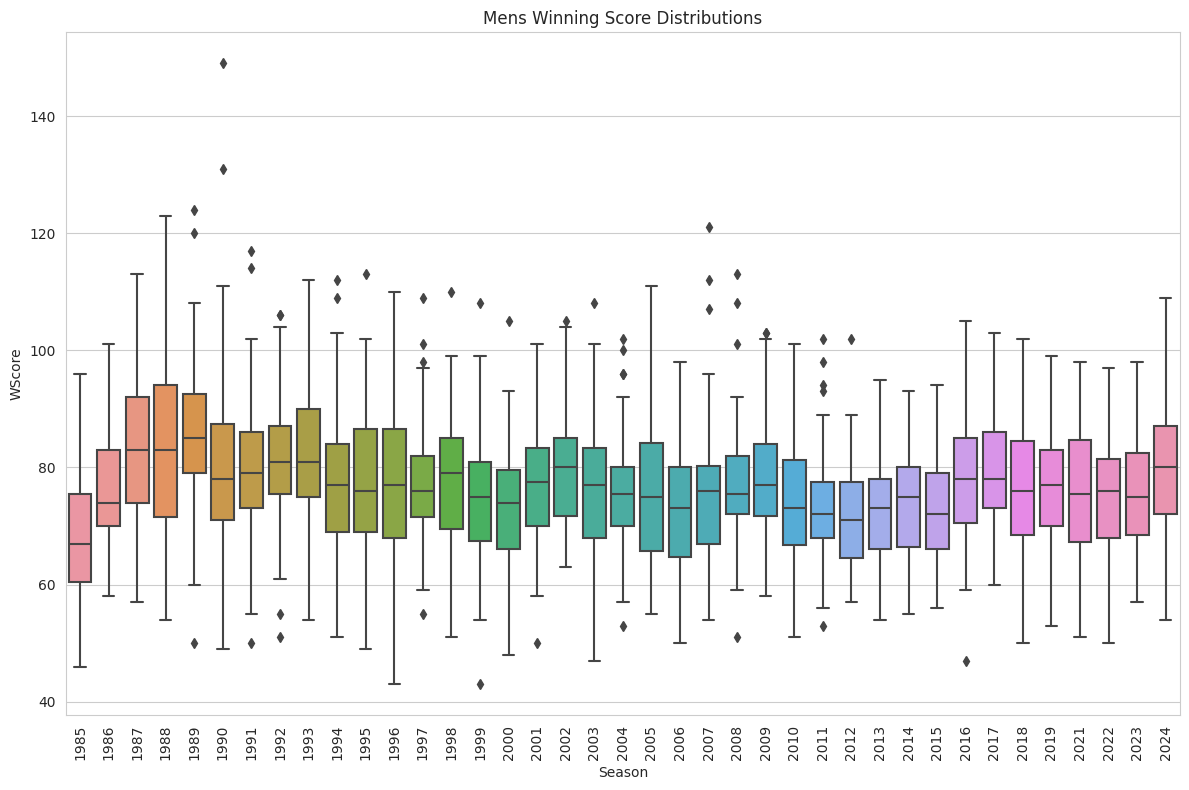

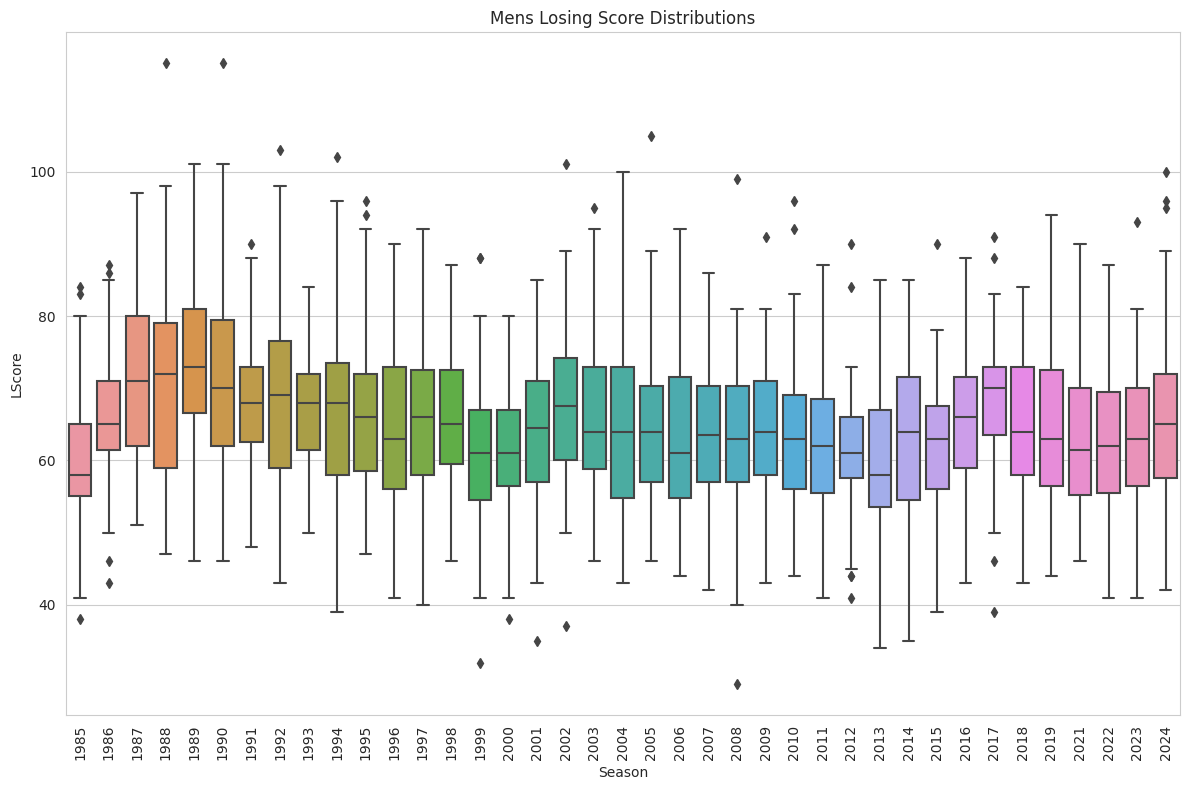

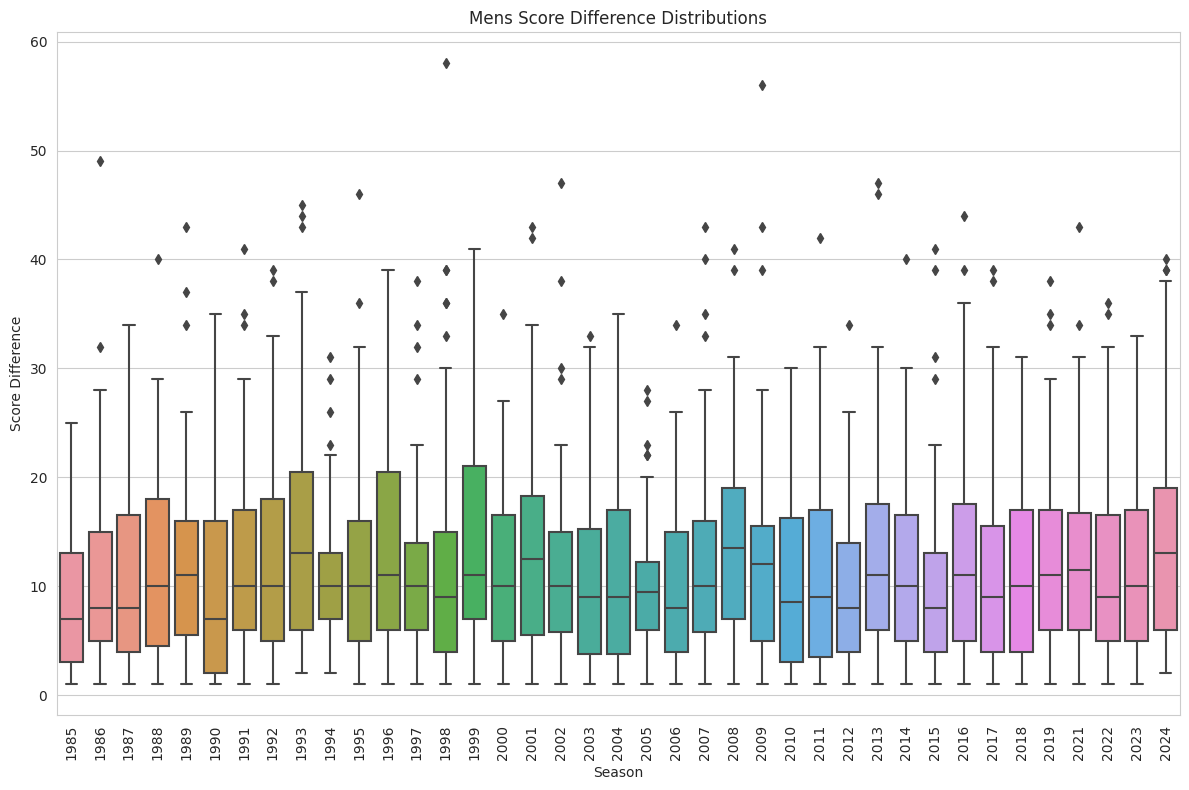

Investigating Womens Team


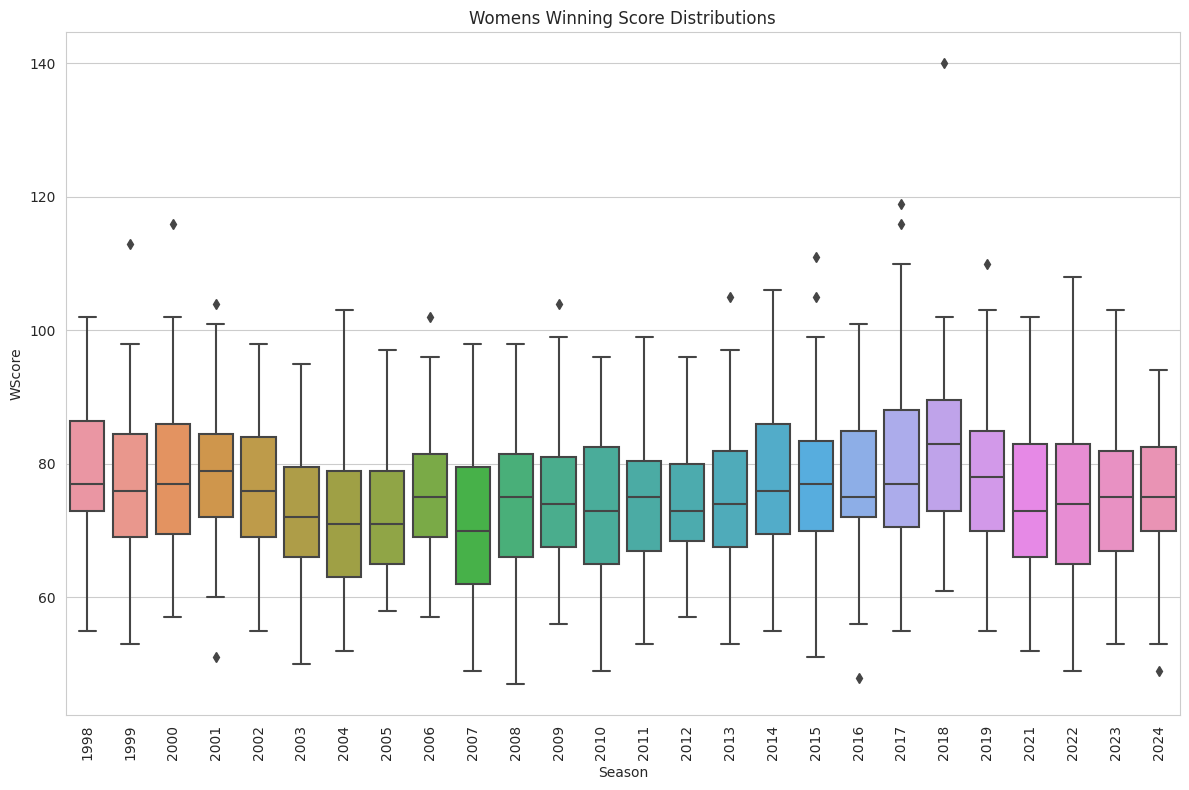

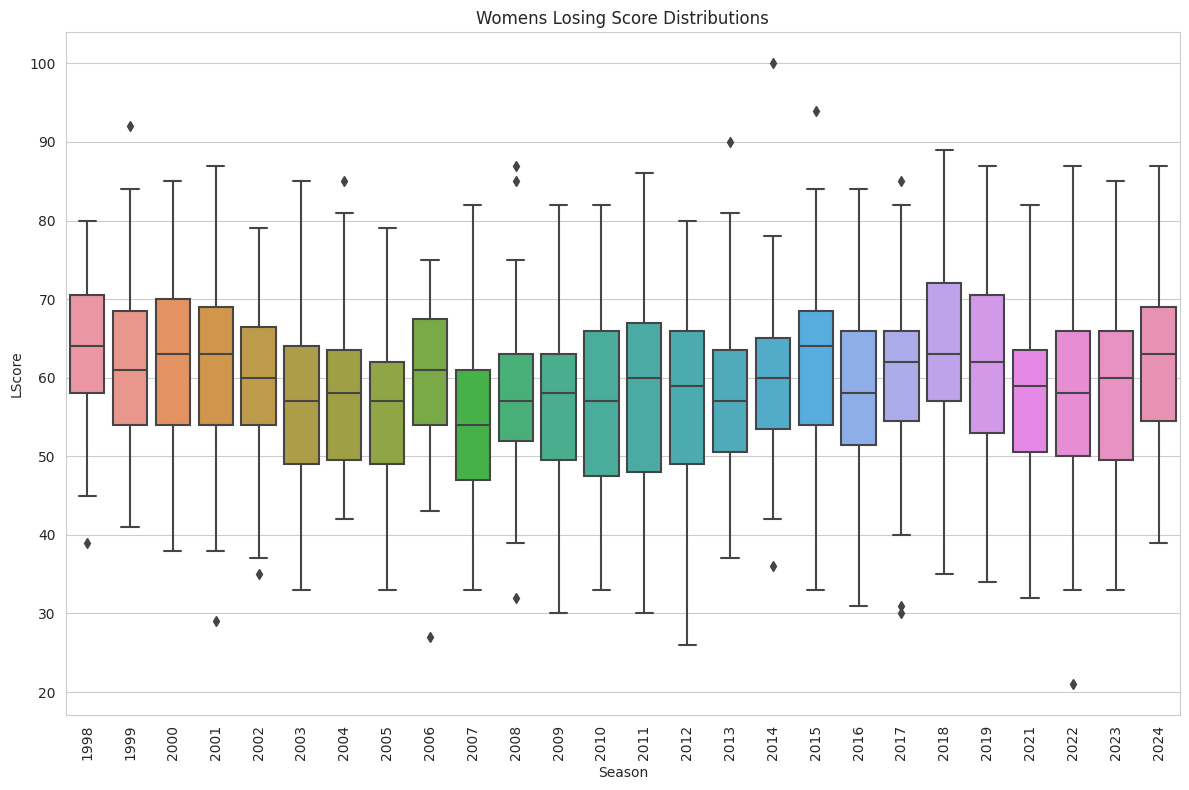

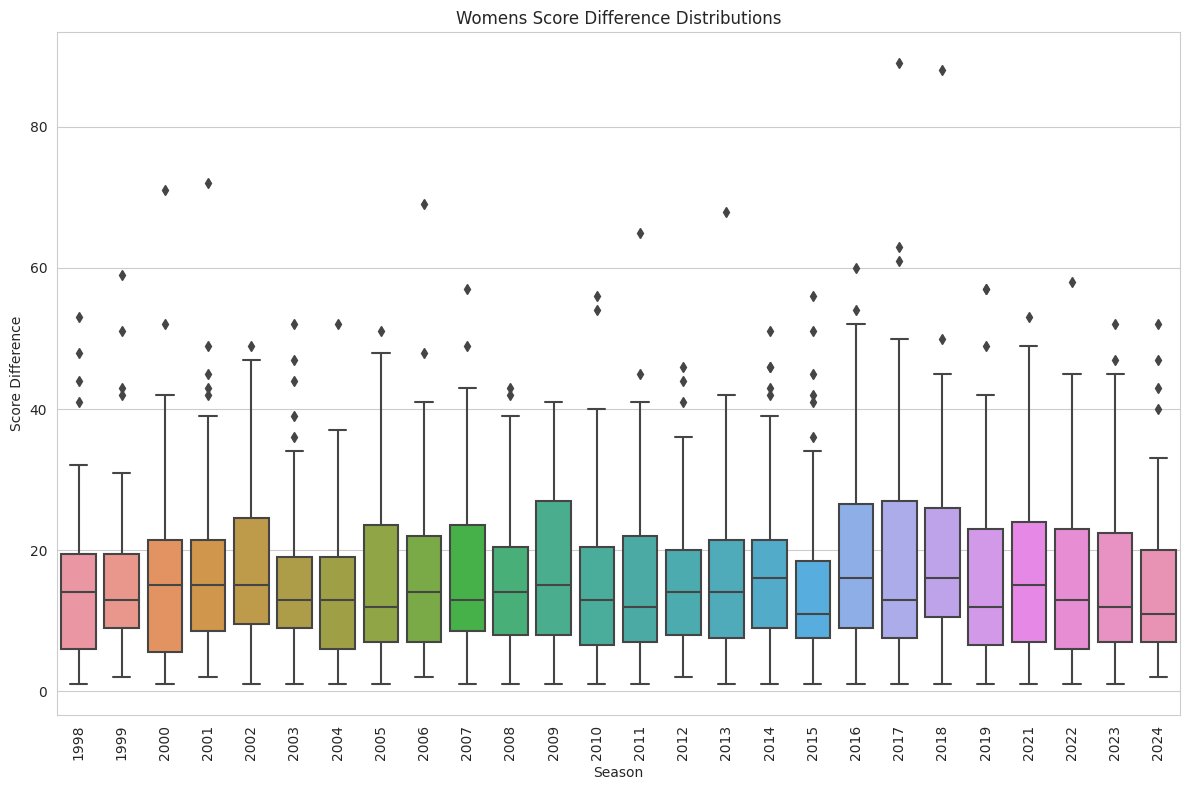

In [14]:
# Look at distributions of winning and losing scores across seasons
for gender in ['Mens', 'Womens']:
    print(f"Investigating {gender} Team")
    if gender == 'Mens':
        df = mens_df
    else:
        df = womens_df
    df['Score Difference']  = df['WScore'] - df['LScore']

    plt.figure(figsize=(12,8))
    sns.boxplot(x='Season', y='WScore', data=df)
    plt.xticks(rotation=90)
    plt.title(f'{gender} Winning Score Distributions')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12,8))
    sns.boxplot(x='Season', y='LScore', data=df)
    plt.xticks(rotation=90)
    plt.title(f'{gender} Losing Score Distributions')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12,8))
    sns.boxplot(x='Season', y='Score Difference', data=df)
    plt.xticks(rotation=90)
    plt.title(f'{gender} Score Difference Distributions')
    plt.tight_layout()
    plt.show()

## Sample Submission
Data Section 1 file: SampleSubmissionStage1.csv

This file illustrates the submission file format for the "warmup" Stage 1 competition. It reflects the simplest possible submission: a 50% winning percentage is predicted for each possible matchup.

If you want to know which predictions are needed, you can simply parse the data rows in the sample submission file.

ID - this is a 14-character string of the format SSSS_XXXX_YYYY, where SSSS is the four digit season number, XXXX is the four-digit TeamID of the lower-ID team, and YYYY is the four-digit TeamID of the higher-ID team.
Pred - this contains the predicted winning percentage for the first team identified in the ID field, the one represented above by XXXX.

In [15]:
ss_df = load_csv(os.path.join(comp_dir, 'SampleSubmissionStage1.csv'))
ss_df.head()

,ID,Pred
0,2021_1101_1102,0.5
1,2021_1101_1103,0.5
2,2021_1101_1104,0.5
3,2021_1101_1105,0.5
4,2021_1101_1106,0.5


# 📊 Data Section 2 - Team Box Scores

This section provides game-by-game stats at a team level (free throws attempted, defensive rebounds, turnovers, etc.) for all regular season, conference tournament, and NCAA® tournament games since the 2003 season (men) or since the 2010 season (women).

Team Box Scores are provided in "Detailed Results" files rather than "Compact Results" files. However, the two files are strongly related.

In a Detailed Results file, the first eight columns (Season, DayNum, WTeamID, WScore, LTeamID, LScore, WLoc, and NumOT) are exactly the same as a Compact Results file. However, in a Detailed Results file, there are many additional columns. The column names should be self-explanatory to basketball fans (as above, "W" or "L" refers to the winning or losing team):

1. WFGM - field goals made (by the winning team)
2. WFGA - field goals attempted (by the winning team)
3. WFGM3 - three pointers made (by the winning team)
4. WFGA3 - three pointers attempted (by the winning team)
5. WFTM - free throws made (by the winning team)
6. WFTA - free throws attempted (by the winning team)
7. WOR - offensive rebounds (pulled by the winning team)
8. WDR - defensive rebounds (pulled by the winning team)
9. WAst - assists (by the winning team)
10. WTO - turnovers committed (by the winning team)
11. WStl - steals (accomplished by the winning team)
12. WBlk - blocks (accomplished by the winning team)
13. WPF - personal fouls committed (by the winning team)

(and then the same set of stats from the perspective of the losing team: LFGM is the number of field goals made by the losing team, and so on up to LPF).

Note: by convention, "field goals made" (either WFGM or LFGM) refers to the total number of fields goals made by a team, a combination of both two-point field goals and three-point field goals. And "three point field goals made" (either WFGM3 or LFGM3) is just the three-point fields goals made, of course. So if you want to know specifically about two-point field goals, you have to subtract one from the other (e.g., WFGM - WFGM3). And the total number of points scored is most simply expressed as (2*FGM) + FGM3 + FTM.

## Regular Season Results
Data Section 2 file: MRegularSeasonDetailedResults.csv and WRegularSeasonDetailedResults.csv

These files provide team-level box scores for many regular seasons of historical data, starting with the 2003 season (men) or starting with the 2010 season (women). All games listed in the MRegularSeasonCompactResults file since the 2003 season should exactly be present in the MRegularSeasonDetailedResults file, and similarly, all games listed in the WRegularSeasonCompactResults file since the 2010 season should exactly be present in the WRegularSeasonDetailedResults file. However, earlier women's data is challenging to collect, and so approximately 1.5% of women's games in the 2010, 2011, and 2012 seasons are unavailable in the data. All games from 2013 to the present should have detailed results present. In previous years, there was also a small amount of detailed results missing from the women's seasons 2013 and 2014, but those have been brought up to 100% completion in this year's data. Also, there was a nagging problem in recent years where many games during the 2021 season showed zero personal fouls for both teams; the correct personal foul numbers have been reconstructed this year and so there are no games with zero personal fouls anymore from 2021, just like in other seasons.

In [16]:
mens_df = load_csv(os.path.join(comp_dir, 'MRegularSeasonDetailedResults.csv'))
womens_df = load_csv(os.path.join(comp_dir, 'WRegularSeasonDetailedResults.csv'))
for gender in ['Mens', 'Womens']:
    print(f"Investigating {gender} Team")
    if gender == 'Mens':
        df = mens_df
    else:
        df = womens_df
    display(df.describe())
    display(df.head())

Investigating Mens Team


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,...,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000
mean,2014.051044,70.072462,1288.243422,75.859651,1283.044987,63.857732,0.068658,26.392099,55.746305,7.339085,...,20.138276,12.072488,17.736907,10.480668,21.632934,11.405867,13.737130,5.901031,3.144239,19.324709
std,6.464256,35.845605,105.298971,11.007412,104.764160,10.851210,0.305052,4.683480,7.461328,3.116574,...,6.064958,5.345290,7.085348,4.221941,4.519345,3.724047,4.536147,2.778302,2.628125,4.551727
min,2003.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000,10.000000,26.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,2009.000000,38.000000,1199.000000,68.000000,1192.000000,57.000000,0.000000,23.000000,51.000000,5.000000,...,16.000000,8.000000,13.000000,7.000000,19.000000,9.000000,11.000000,4.000000,1.000000,16.000000
50%,2014.000000,73.000000,1287.000000,75.000000,1282.000000,64.000000,0.000000,26.000000,55.000000,7.000000,...,20.000000,12.000000,17.000000,10.000000,21.000000,11.000000,13.000000,6.000000,3.000000,19.000000
75%,2020.000000,101.000000,1381.000000,83.000000,1374.000000,71.000000,0.000000,29.000000,60.000000,9.000000,...,24.000000,15.000000,22.000000,13.000000,25.000000,14.000000,17.000000,8.000000,4.000000,22.000000
max,2025.000000,132.000000,1480.000000,149.000000,1480.000000,144.000000,6.000000,57.000000,103.000000,26.000000,...,59.000000,48.000000,65.000000,36.000000,49.000000,31.000000,41.000000,22.000000,33.000000,45.000000


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


Investigating Womens Team


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,...,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000
mean,2017.310476,68.860759,3285.050867,71.711963,3286.594658,57.234370,0.051583,25.847537,58.980010,6.268876,...,17.913974,10.511119,15.515175,11.395447,22.441116,10.933688,16.745024,6.923831,3.434950,18.204184
std,4.531798,36.258086,104.022507,11.547894,105.457243,10.964583,0.258755,4.982451,7.975729,3.125925,...,6.469817,4.938106,6.632564,4.639725,4.939763,3.805204,5.597689,3.279905,3.666537,4.557235
min,2010.000000,0.000000,3101.000000,30.000000,3101.000000,11.000000,0.000000,9.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,2013.000000,35.000000,3196.000000,64.000000,3195.000000,50.000000,0.000000,22.000000,53.000000,4.000000,...,13.000000,7.000000,11.000000,8.000000,19.000000,8.000000,13.000000,5.000000,1.000000,15.000000
50%,2017.000000,72.000000,3283.000000,71.000000,3287.000000,57.000000,0.000000,25.000000,59.000000,6.000000,...,17.000000,10.000000,15.000000,11.000000,22.000000,11.000000,16.000000,7.000000,3.000000,18.000000
75%,2021.000000,101.000000,3376.000000,79.000000,3377.000000,64.000000,0.000000,29.000000,64.000000,8.000000,...,22.000000,14.000000,20.000000,14.000000,26.000000,13.000000,20.000000,9.000000,4.000000,21.000000
max,2025.000000,132.000000,3480.000000,140.000000,3480.000000,130.000000,5.000000,58.000000,113.000000,30.000000,...,80.000000,37.000000,52.000000,38.000000,53.000000,34.000000,49.000000,26.000000,42.000000,47.000000


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,11,3103,63,3237,49,H,0,23,54,...,13,6,10,11,27,11,23,7,6,19
1,2010,11,3104,73,3399,68,N,0,26,62,...,21,14,27,14,26,7,20,4,2,27
2,2010,11,3110,71,3224,59,A,0,29,62,...,14,19,23,17,23,8,15,6,0,15
3,2010,11,3111,63,3267,58,A,0,27,52,...,26,16,25,22,22,15,11,14,5,14
4,2010,11,3119,74,3447,70,H,1,30,74,...,17,11,21,21,32,12,14,4,2,14


In [17]:
mens_df.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

Investigating Mens Team


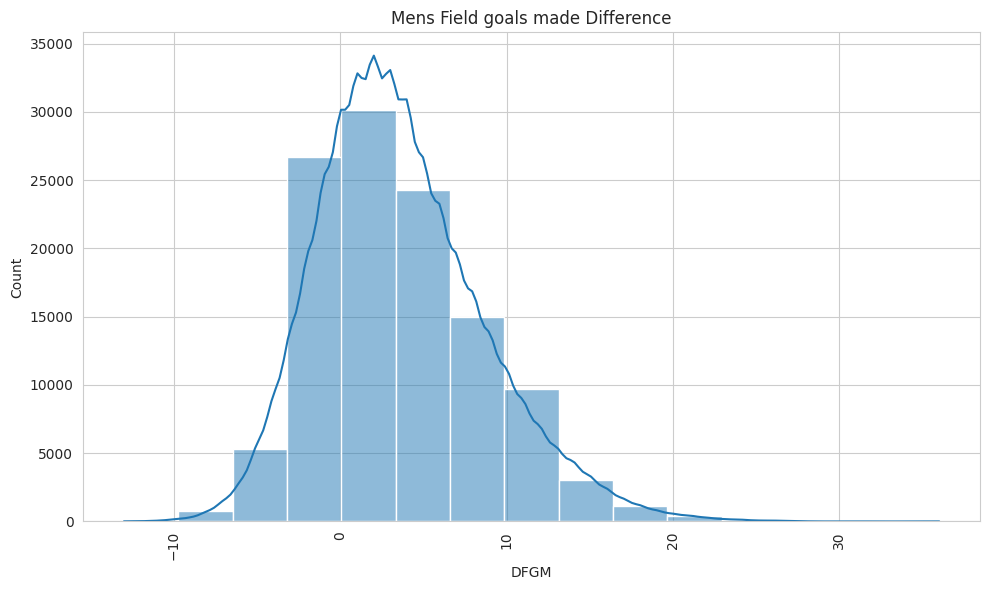

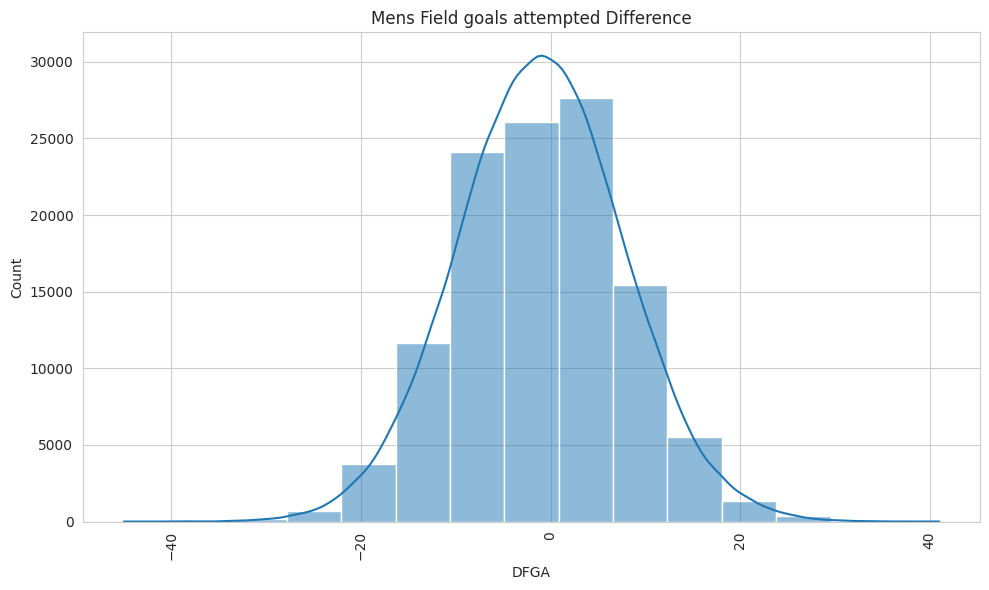

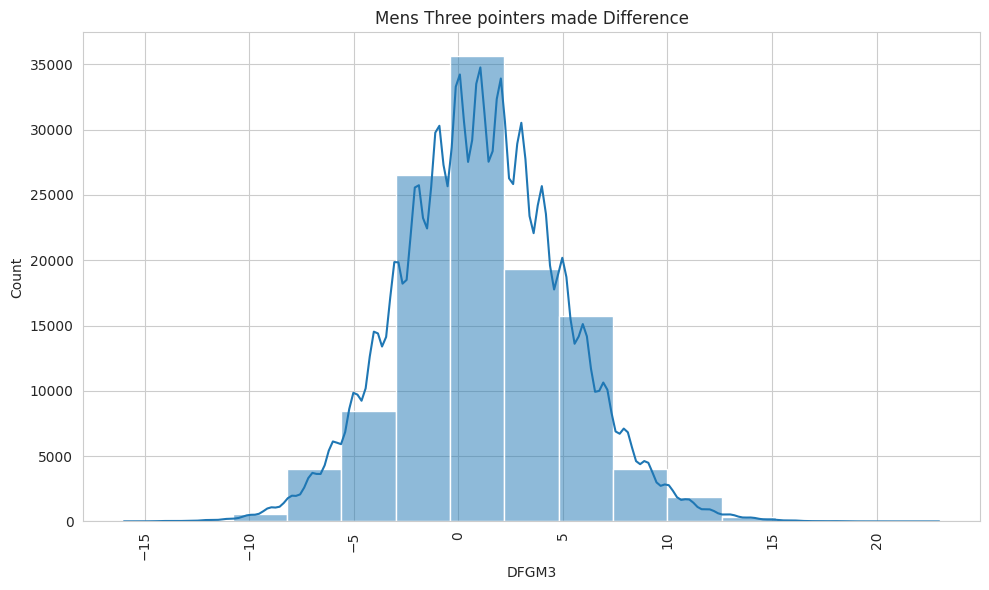

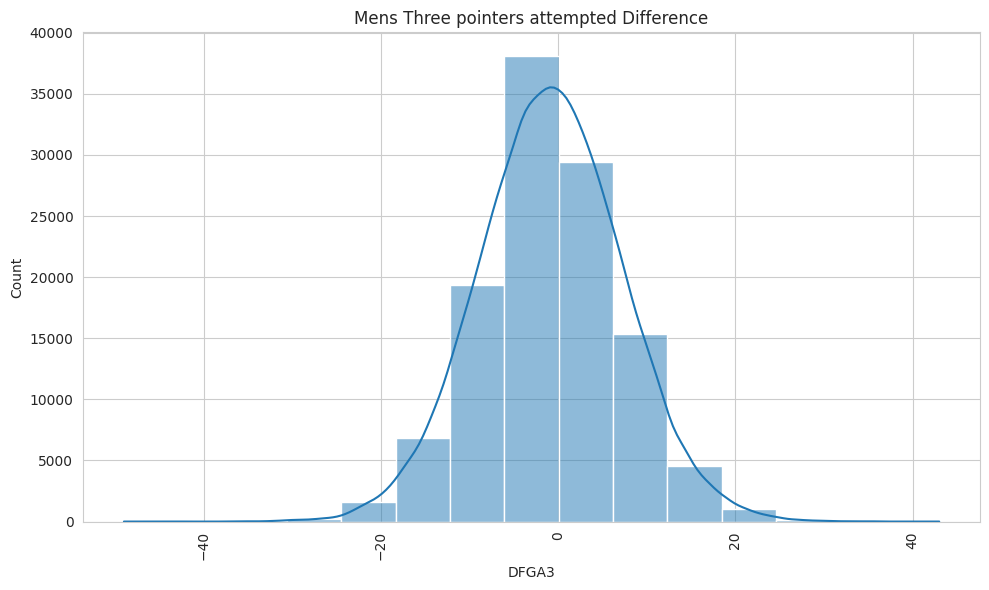

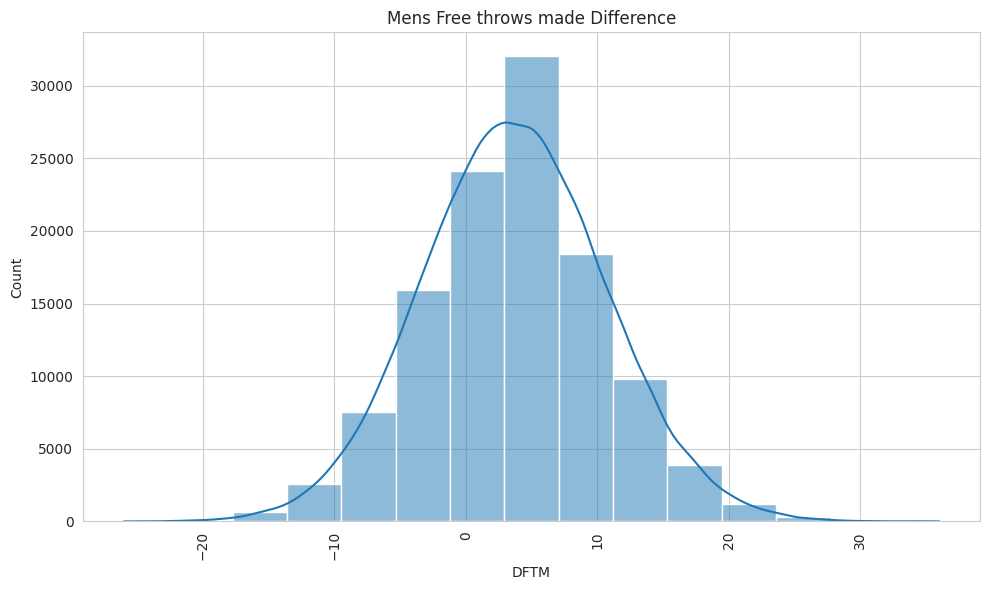

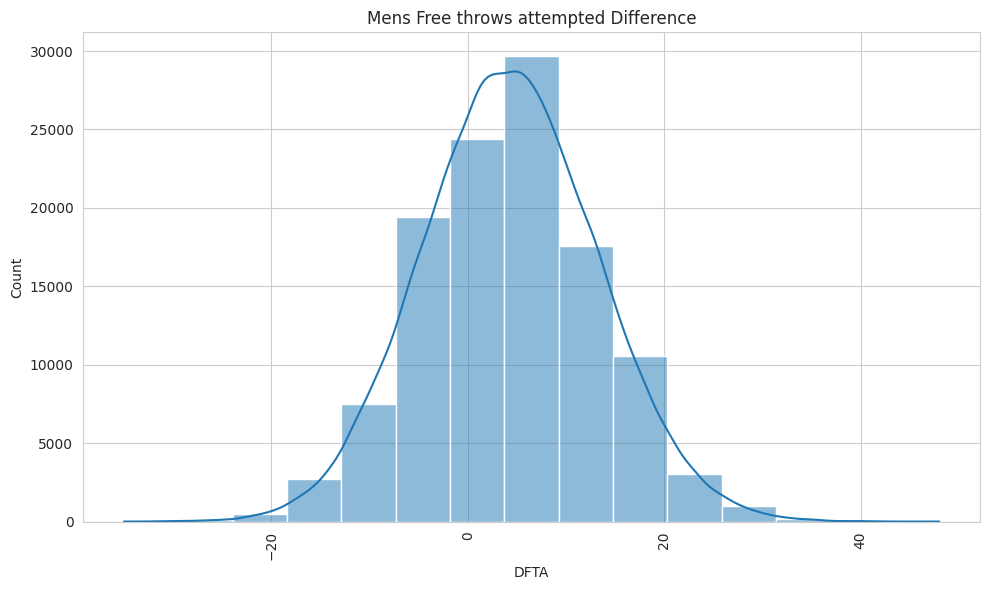

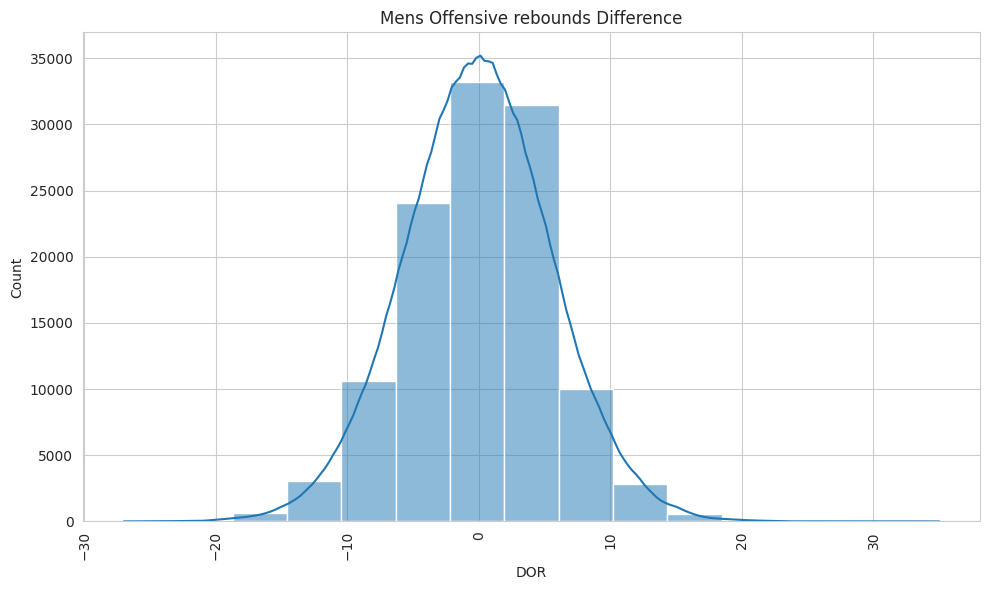

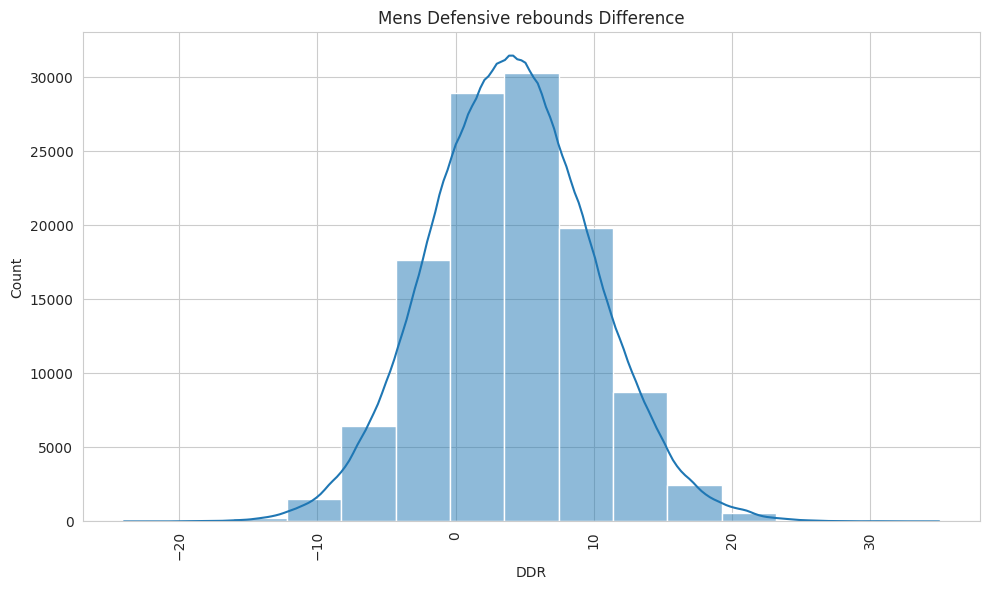

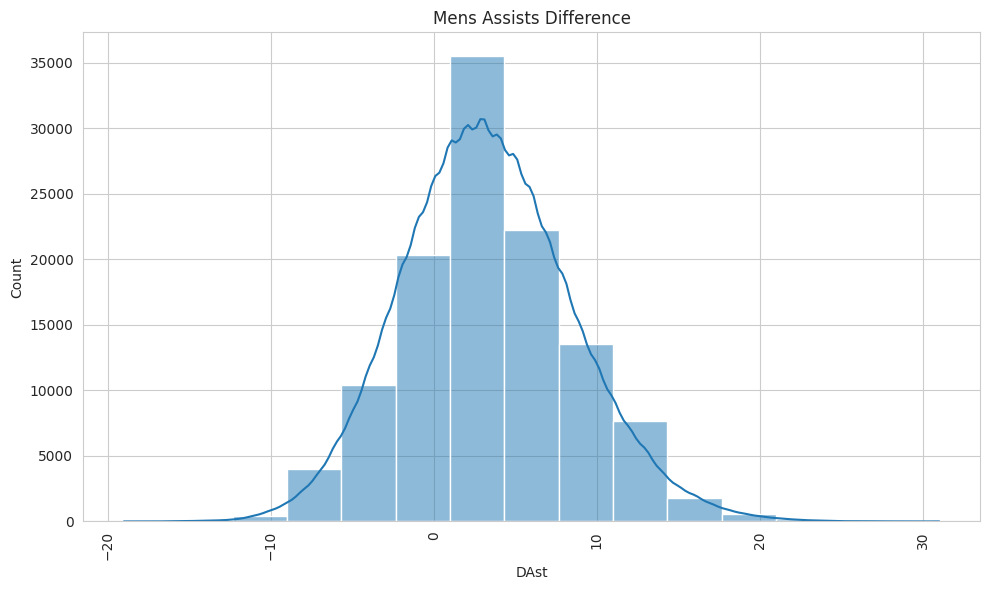

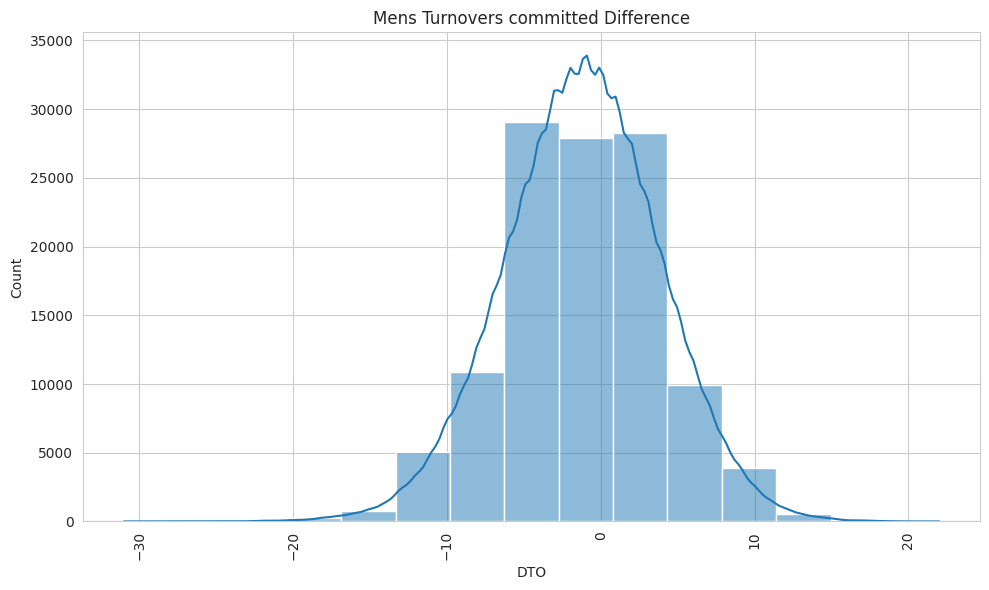

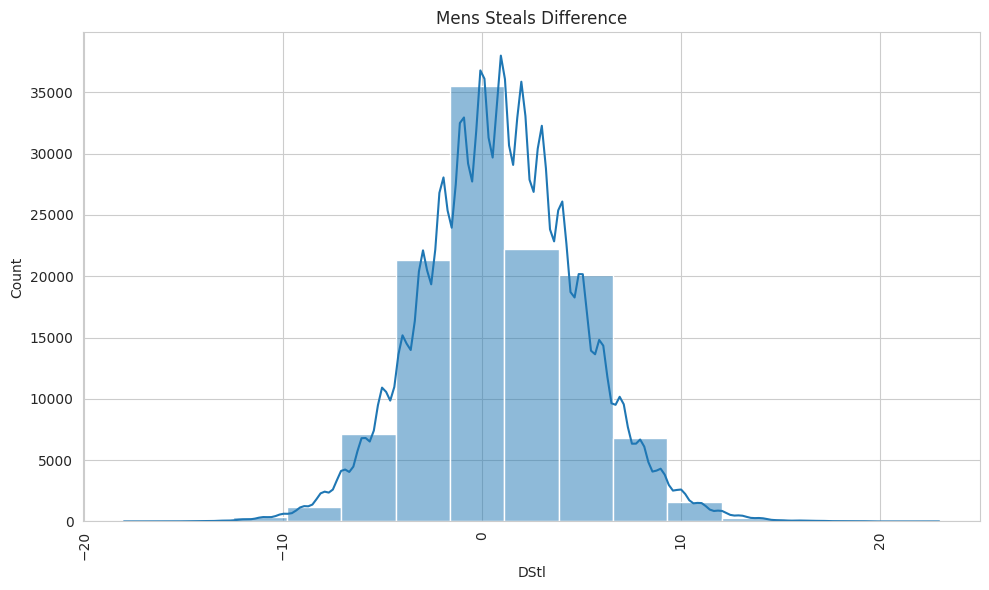

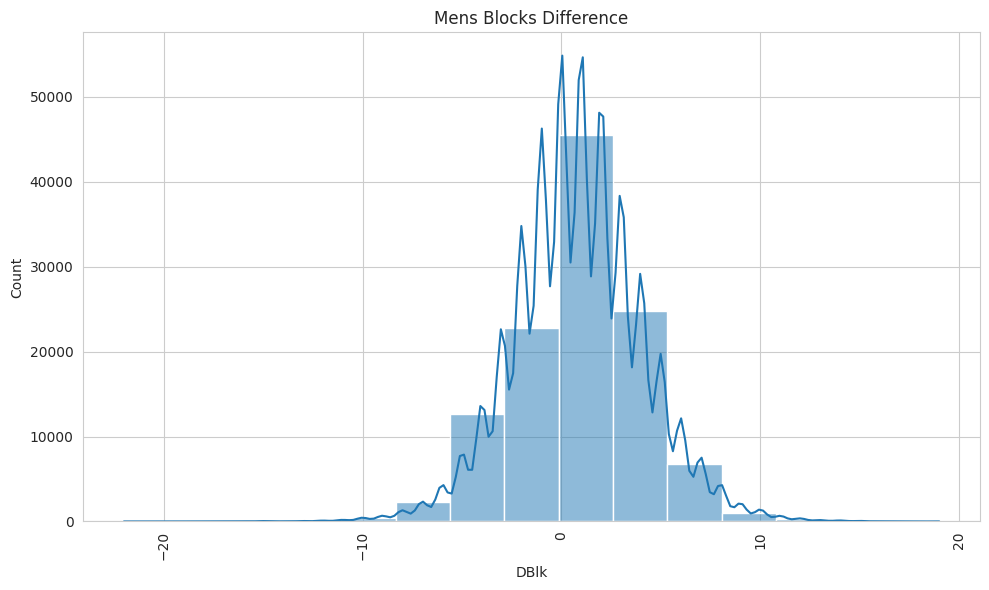

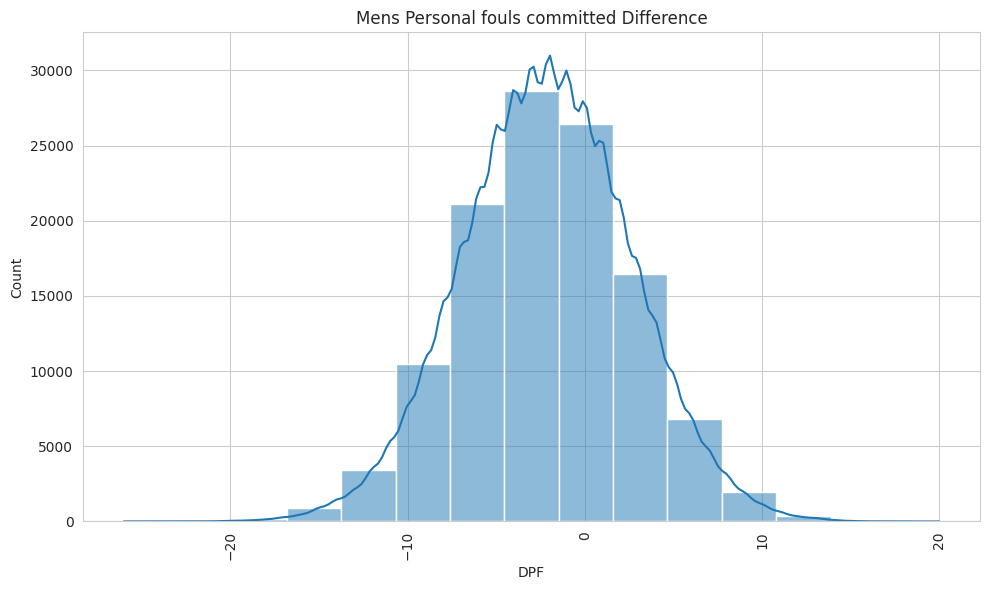

Investigating Womens Team


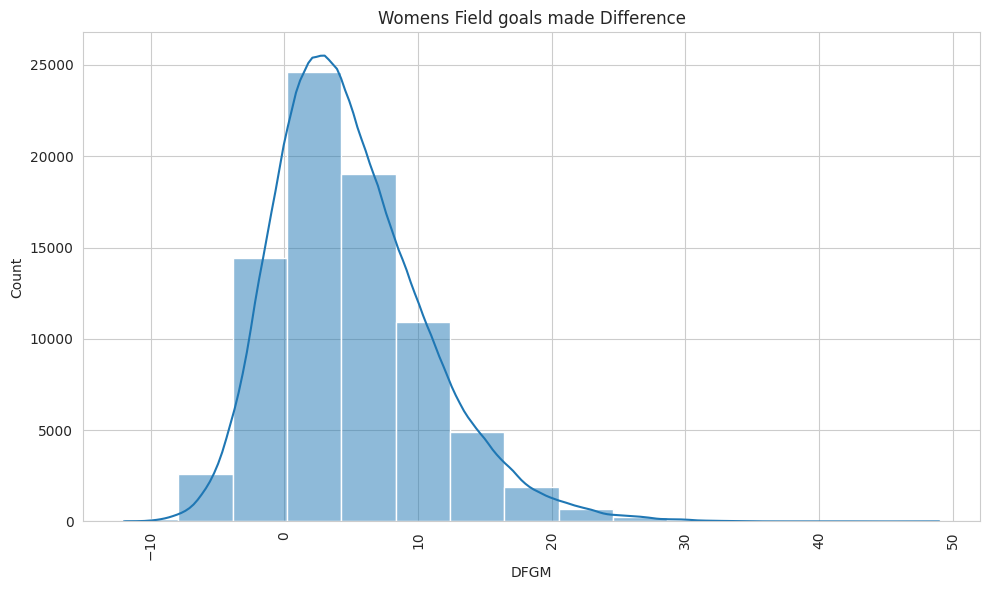

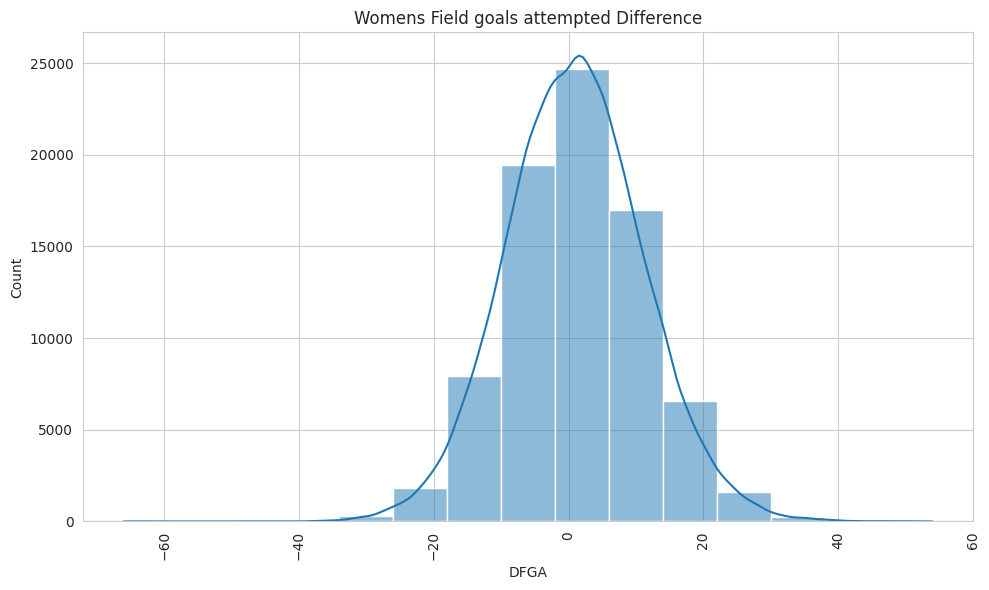

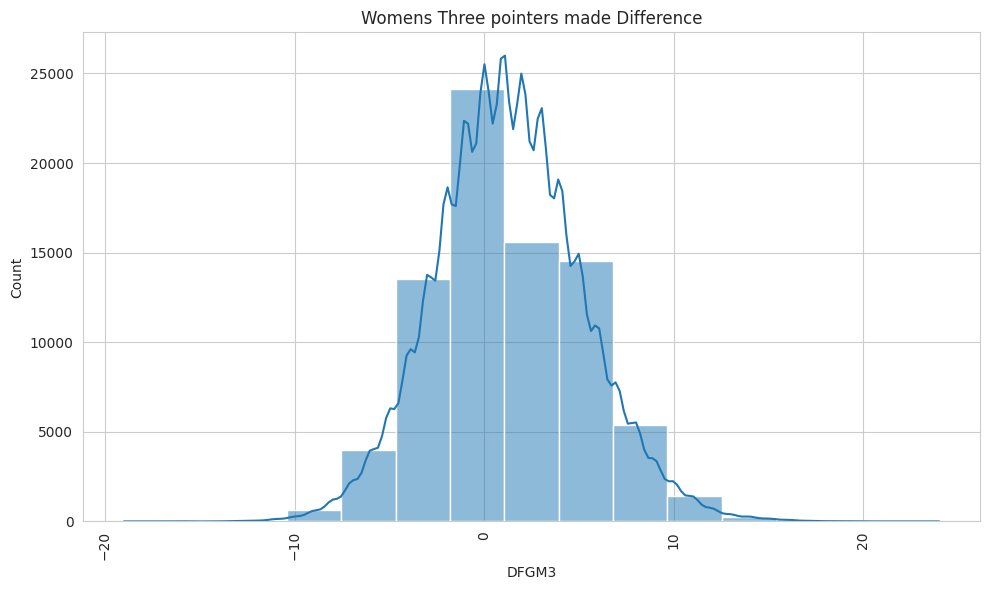

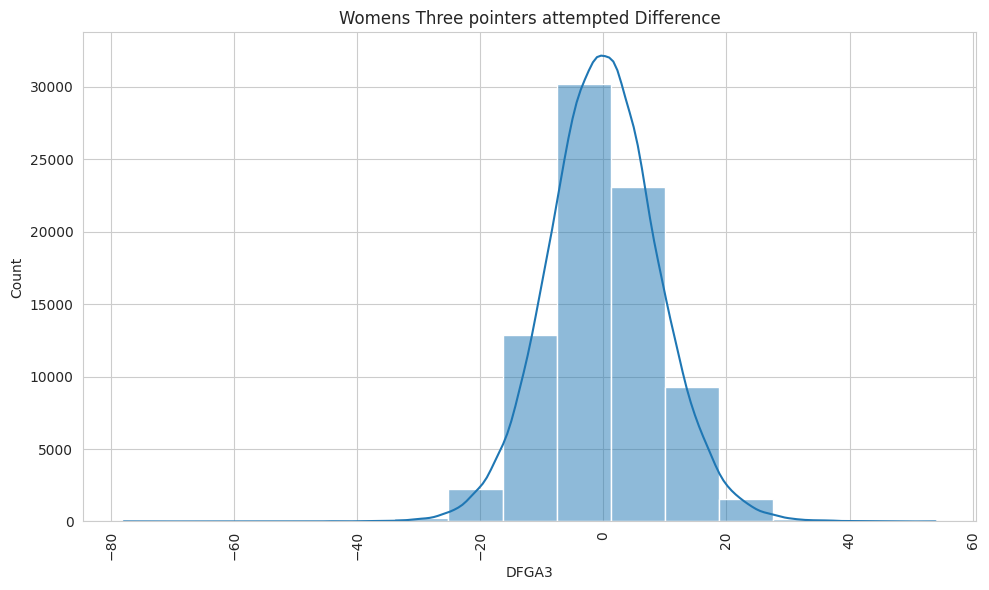

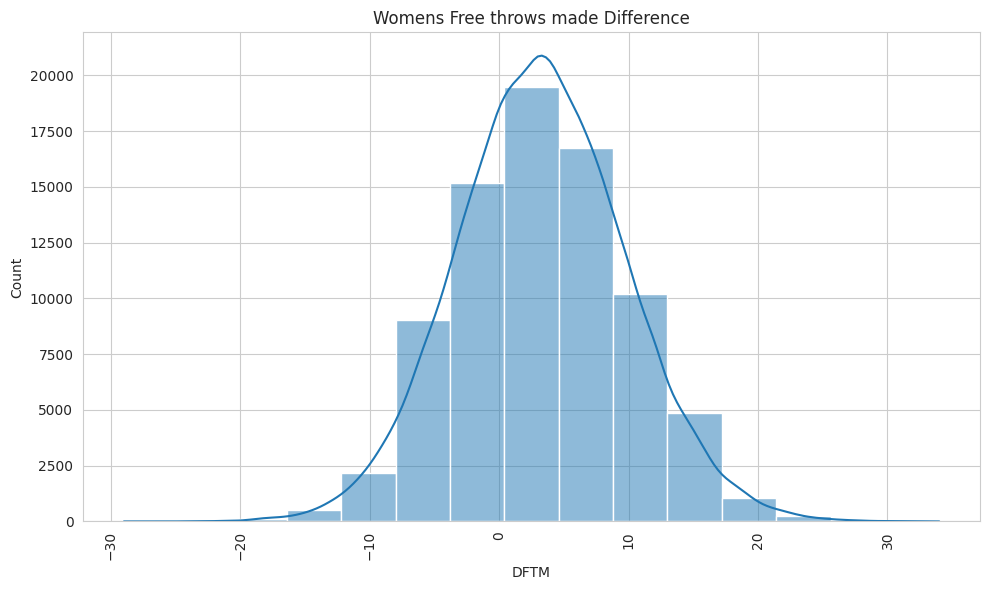

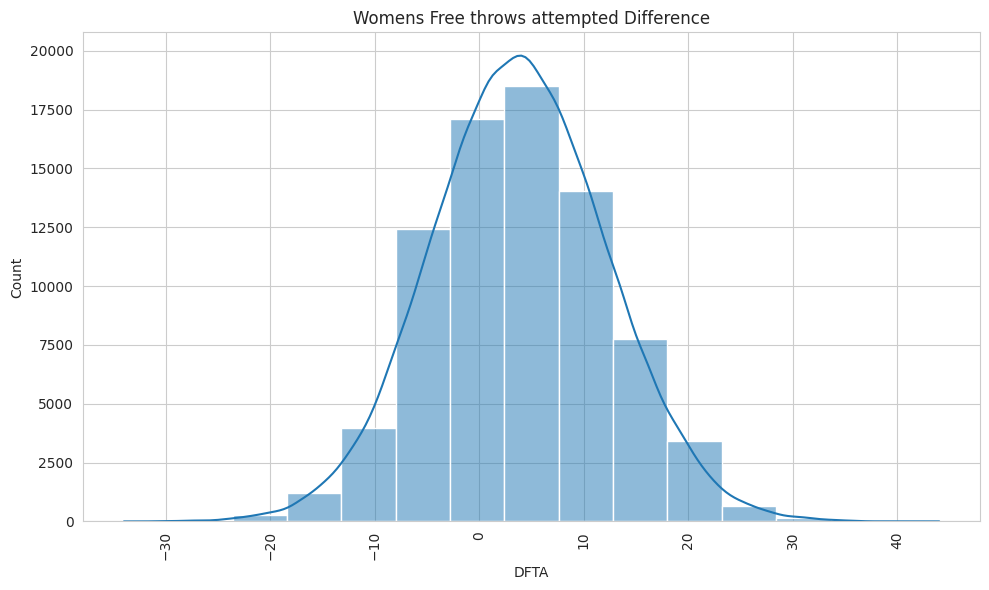

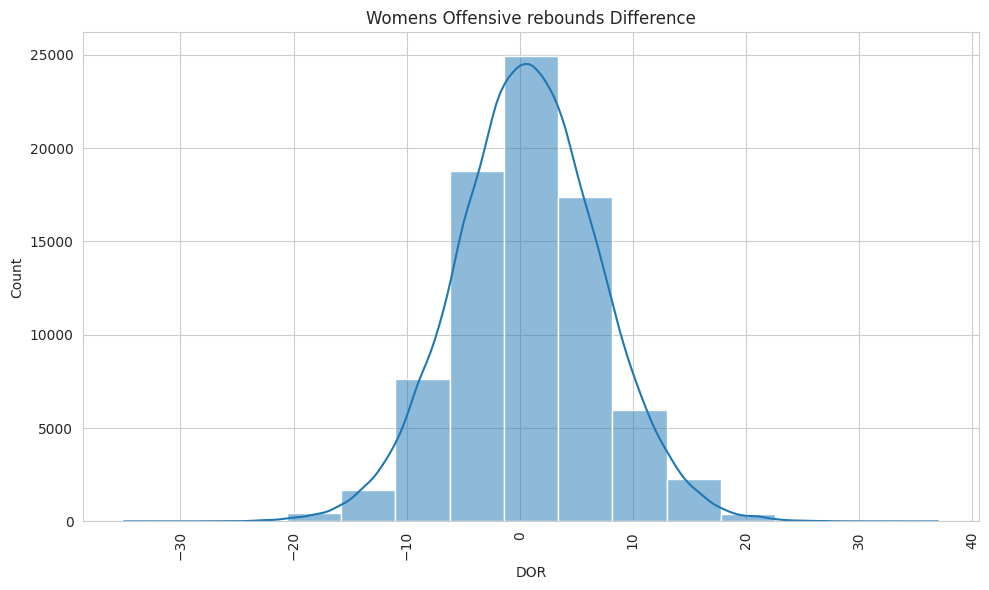

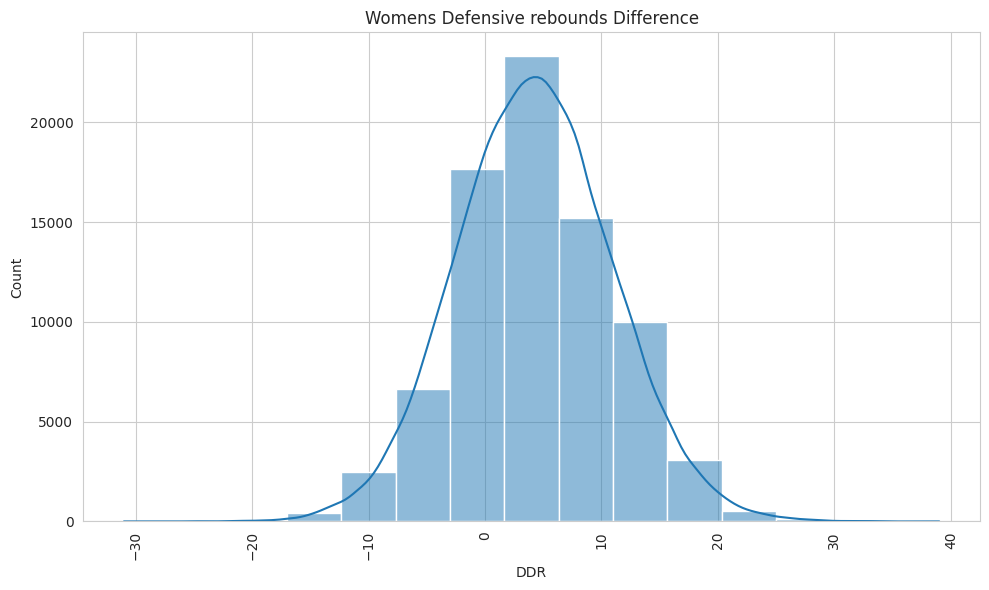

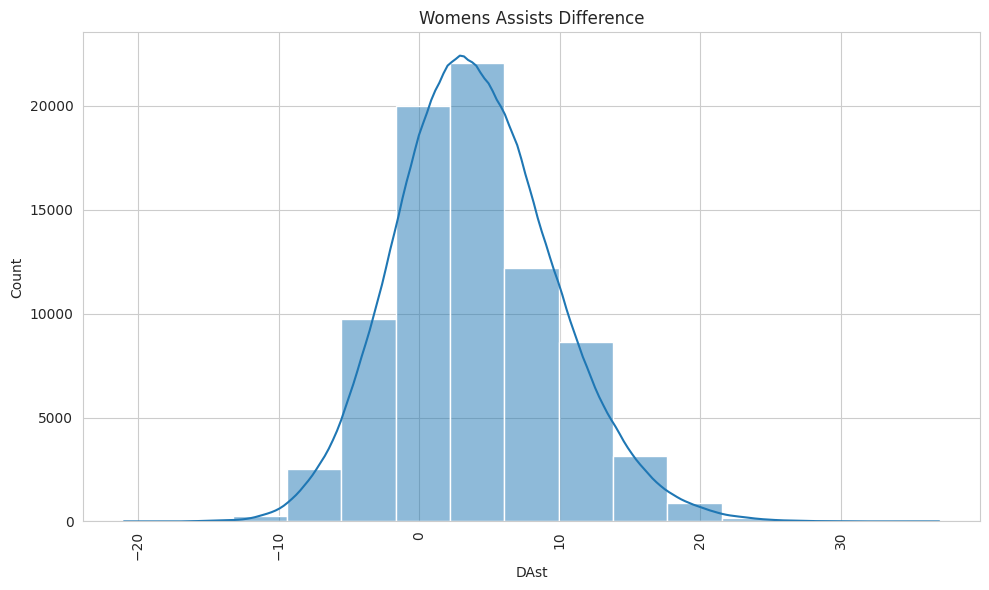

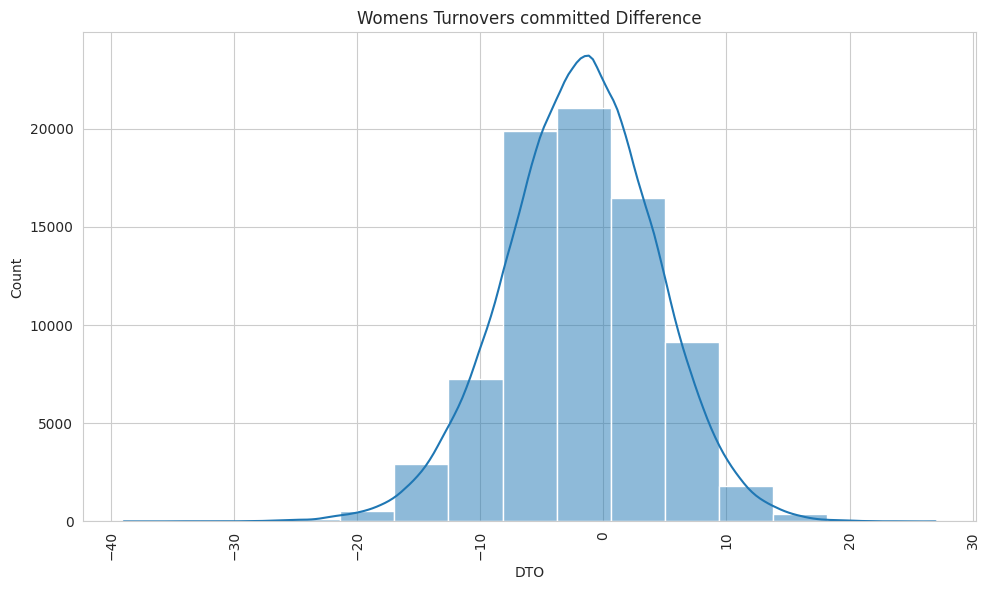

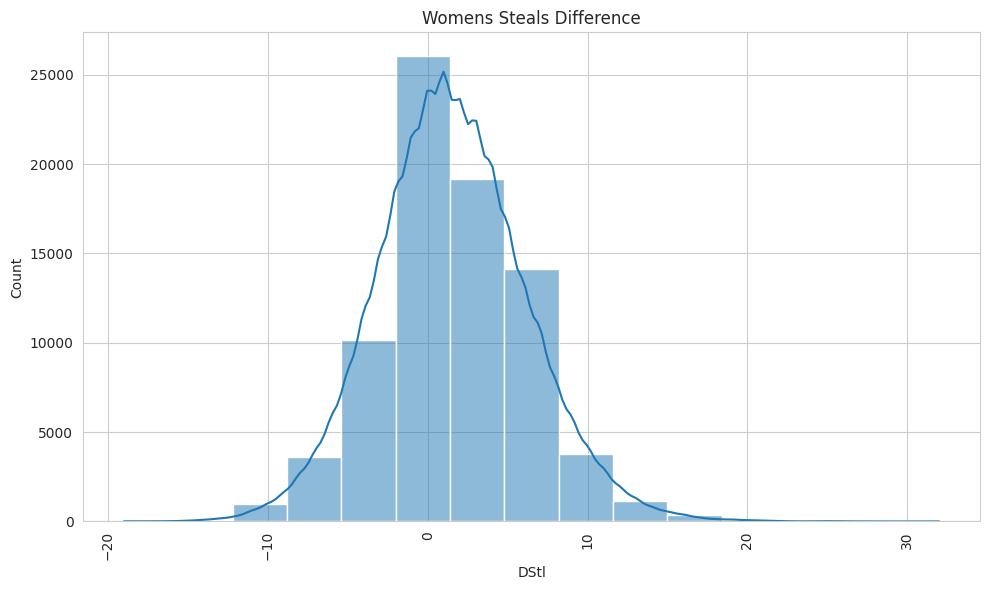

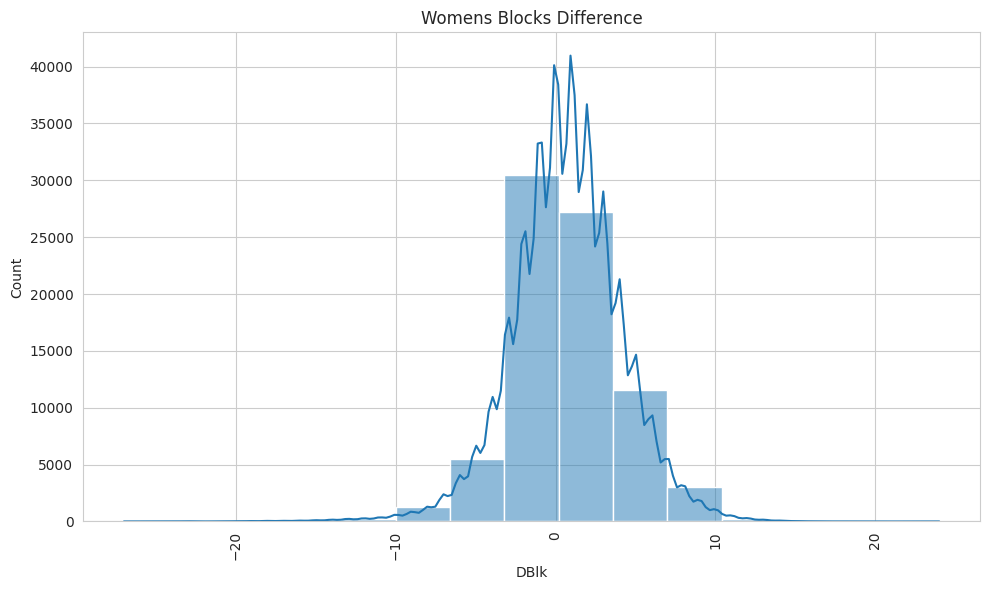

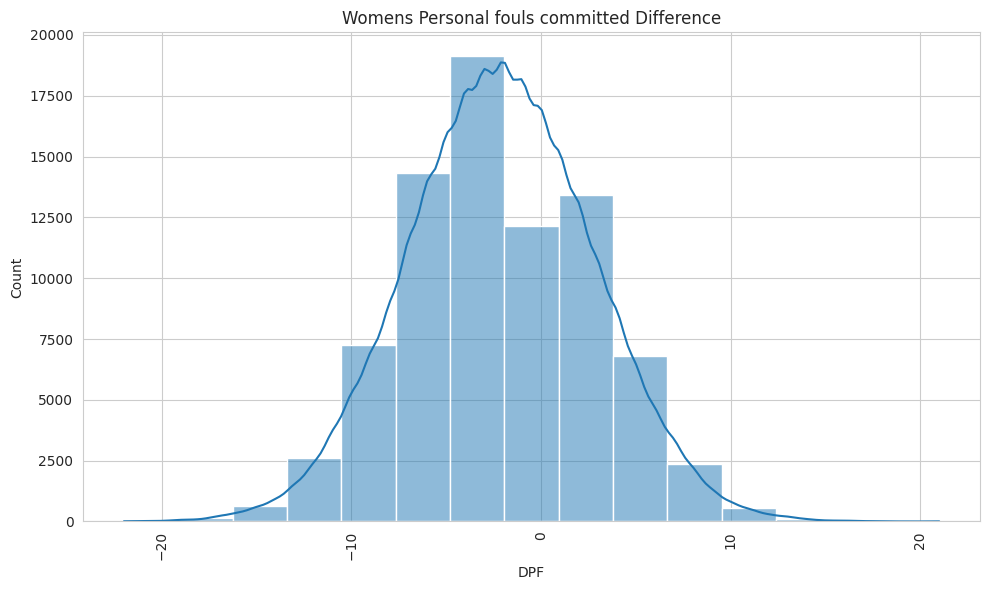

In [18]:
prefix_dict = {
    'W': 'Winning Team',
    'L': 'Losing Team',
}
suffix_dict = {
    'FGM': 'Field goals made', 
    'FGA': 'Field goals attempted', 
    'FGM3': 'Three pointers made', 
    'FGA3': 'Three pointers attempted', 
    'FTM': 'Free throws made', 
    'FTA': 'Free throws attempted', 
    'OR': 'Offensive rebounds', 
    'DR': 'Defensive rebounds', 
    'Ast': 'Assists', 
    'TO': 'Turnovers committed', 
    'Stl': 'Steals', 
    'Blk': 'Blocks', 
    'PF': 'Personal fouls committed',
}
for gender in ['Mens', 'Womens']:
    print(f"Investigating {gender} Team")
    if gender == 'Mens':
        df = mens_df
    else:
        df = womens_df
    for key, value in suffix_dict.items():
        df[f'D{key}'] = df[f'W{key}'] - df[f'L{key}']
        
        plt.figure(figsize=(10,6))
        sns.histplot(df[f'D{key}'], bins=15, kde=True)
        plt.xticks(rotation=90)
        plt.title(f'{gender} {value} Difference')
        plt.tight_layout()
        plt.show()
    

Investigating Mens Team
Investigating Womens Team


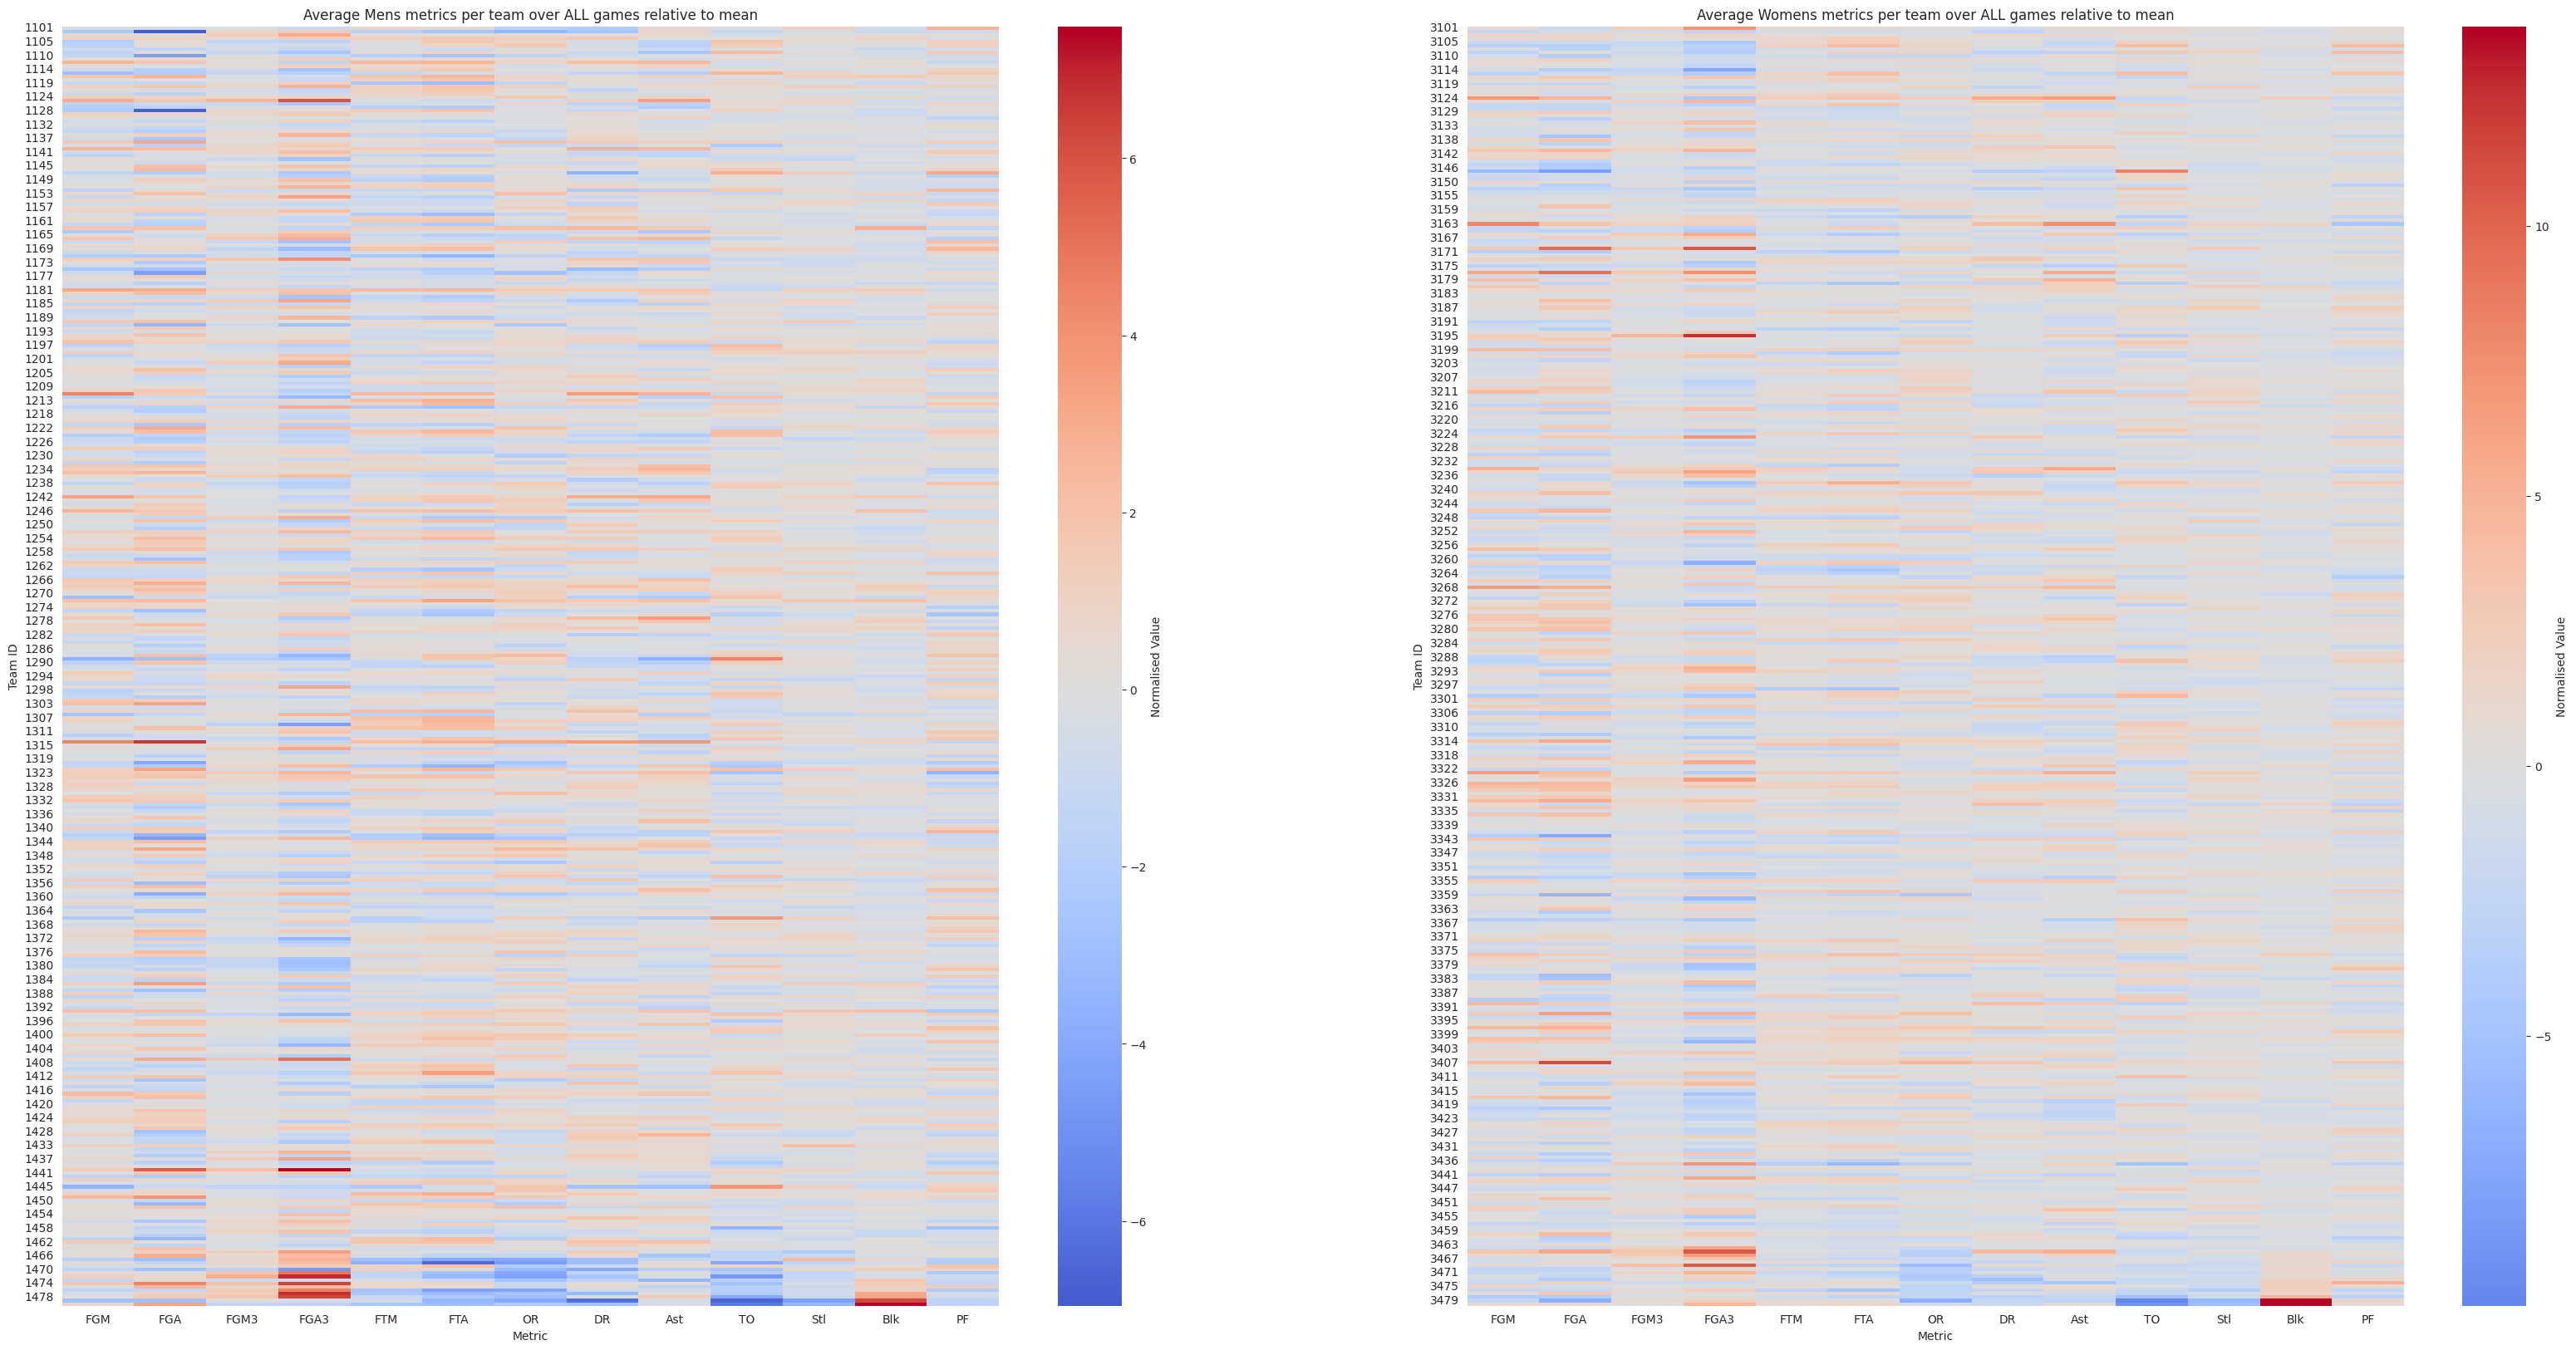

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(40, 20))
for i, gender in enumerate(['Mens', 'Womens']):
    print(f"Investigating {gender} Team")
    if gender == 'Mens':
        df = mens_df
    else:
        df = womens_df
    df.fillna(0, inplace=True)
    df.dropna(inplace=True)
    if len(df) < 1:
        print("Empty df")
    w_columns = [f'W{suffix}' for suffix in suffix_dict.keys()]
    l_columns = [f'L{suffix}' for suffix in suffix_dict.keys()]

    # Group by 'TeamID' and compute the mean for selected columns
    w_heatmap_data_sum = df.groupby('WTeamID')[w_columns].sum()
    l_heatmap_data_sum = df.groupby('LTeamID')[l_columns].sum()
    w_heatmap_data_count = df.groupby('WTeamID')[w_columns].count()
    l_heatmap_data_count = df.groupby('LTeamID')[l_columns].count()

    w_heatmap_data_sum.columns = list(suffix_dict.keys())
    l_heatmap_data_sum.columns = list(suffix_dict.keys())
    w_heatmap_data_count.columns = list(suffix_dict.keys())
    l_heatmap_data_count.columns = list(suffix_dict.keys())

    if w_heatmap_data_sum.empty or l_heatmap_data_sum.empty:
        print("Warning: One of the grouped dataframes is empty!")
    
    heatmap_data = (w_heatmap_data_sum + l_heatmap_data_sum)/(w_heatmap_data_count + l_heatmap_data_count)
    heatmap_data = heatmap_data - np.mean(heatmap_data, axis=0)
    # Plot heatmap
    sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", fmt=".1f", cbar_kws={'label': 'Normalised Value'}, center=0, ax=axes[i])
    axes[i].set_ylabel("Team ID")
    axes[i].set_xlabel("Metric")
    axes[i].set_title(f"Average {gender} metrics per team over ALL games relative to mean")
plt.show()


# Conclusion
More work to come, upvote me for more content!